In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PMProfiles_Selectedspecies_Profiles_v01172025.csv to PMProfiles_Selectedspecies_Profiles_v01172025.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
DATASET_NAME = "PMProfiles_Selectedspecies_Profiles_v01172025.csv"
df1 = pd.read_csv('/content/'+DATASET_NAME, encoding='ISO-8859-1')

In [ ]:
df1

In [ ]:
dfP = df1.pivot_table(index=['PROFILE_CODE', 'PROFILE_NAME','SCC1','SCC2','SCC3'], columns='SPECIES_NAME', values='WEIGHT_PERCENT', aggfunc='first').reset_index()
# Fill NaN values with 0 (or any other value you prefer)
#dfP = dfP.fillna(0)
#dfP.to_csv('PMProfiles_Selectedspecies_Profiles_Pivot_v01172025.csv')

In [ ]:
desc=dfP.describe()
desc.loc['NaN count'] = dfP.isna().sum()
desc.to_csv("descStats.csv")

In [ ]:
dfP['Organic carbon'].describe()

count    1071.000000
mean       37.268422
std        34.085785
min         0.000000
25%         9.767896
50%        35.235724
75%        56.267328
max       438.292700
Name: Organic carbon, dtype: float64

In [ ]:
dfP['Organic carbon'].isna().sum()

0

In [ ]:
dfP['Organic carbon']

0        8.7680
1        0.0000
2        4.4158
3        1.9097
4        2.9031
         ...   
1294    14.3500
1295     5.2550
1296     3.5000
1297    29.7350
1298     7.3590
Name: Organic carbon, Length: 1299, dtype: float64

In [ ]:
#dfP['Organic carbon'] = np.where(dfP['Organic carbon'] > 0,dfP['Organic carbon'], dfP['Organic carbon I'] + dfP['Organic carbon II'] + dfP['Organic carbon III']+ dfP['Organic carbon IV'] ) #dfP['Organic carbon'] =
dfP['Organic carbon'] =dfP.apply(lambda row:  row['Organic carbon'] if (not pd.isna(row['Organic carbon']) or row['Organic carbon'] > 0) else row[['Organic carbon I','Organic carbon II','Organic carbon III','Organic carbon IV','Pyrolyzed organic carbon']].sum(),axis=1) #dfP['Organic carbon'] =
dfP['Elemental Carbon'] =dfP.apply(lambda row:  row['Elemental Carbon'] if (not pd.isna(row['Elemental Carbon']) or row['Elemental Carbon'] > 0) else (row['Elemental carbon I']+row['Elemental carbon II']+row['Elemental carbon III']-row['Pyrolyzed organic carbon']),axis=1) #dfP['Organic carbon'] =

In [ ]:
#dfP['Organic carbon'] = dfP['Organic carbon'].apply(lambda x: x if (not pd.isna(x) and x >= 0) else )

0        8.7680
1        0.0000
2        4.4158
3        1.9097
4        2.9031
         ...   
1294    14.3500
1295     5.2550
1296     3.5000
1297    29.7350
1298     7.3590
Length: 1299, dtype: float64

In [ ]:
dfP.columns

Index(['PROFILE_CODE', 'PROFILE_NAME', 'SCC1', 'SCC2', 'SCC3', 'Aluminum',
       'Ammonium', 'Antimony', 'Arsenic', 'Barium', 'Bromine', 'Cadmium',
       'Calcium', 'Calcium ion', 'Cerium', 'Cesium', 'Chloride ion',
       'Chlorine', 'Chromium', 'Cobalt', 'Copper', 'Elemental Carbon',
       'Elemental carbon I', 'Elemental carbon II', 'Elemental carbon III',
       'Europium', 'Fluoride ion', 'Gallium', 'Gold', 'Hafnium', 'Indium',
       'Iridium', 'Iron', 'Lanthanum', 'Lead', 'Lithium', 'Magnesium',
       'Manganese', 'Mercury', 'Molybdenum', 'Nickel', 'Niobium', 'Nitrate',
       'Organic carbon', 'Organic carbon I', 'Organic carbon II',
       'Organic carbon III', 'Organic carbon IV', 'Palladium', 'Phosphorus',
       'Potassium', 'Potassium ion', 'Pyrolyzed organic carbon', 'Rubidium',
       'Samarium', 'Scandium', 'Selenium', 'Silicon', 'Silver', 'Sodium',
       'Sodium ion', 'Strontium', 'Sulfate', 'Sulfur', 'Tantalum', 'Tellurium',
       'Terbium', 'Thallium', 'Thorium

In [ ]:
dfP.shape[1]

78

In [ ]:
columns_to_remove = ['Bromine','Calcium ion','Cerium','Cesium','Europium','Fluoride ion','Hafnium','Iridium','Lithium','Niobium','Total carbon','Samarium', 'Scandium', 'Tantalum', 'Tellurium','Terbium', 'Thorium','Tungsten', 'Uranium','Organic carbon I', 'Organic carbon II','Organic carbon III','Organic carbon IV','Elemental carbon I','Pyrolyzed organic carbon','Elemental carbon II','Elemental carbon III']
#, 'Phosphate'
# Remove the selected columns
df = dfP.drop(columns=columns_to_remove)

In [ ]:
df.shape[1]

51

In [ ]:
df['Total'] = df.iloc[:, 5:].sum(axis=1)

In [ ]:
df.columns[5:-1]

Index(['Aluminum', 'Ammonium', 'Antimony', 'Arsenic', 'Barium', 'Cadmium',
       'Calcium', 'Chloride ion', 'Chlorine', 'Chromium', 'Cobalt', 'Copper',
       'Elemental Carbon', 'Gallium', 'Gold', 'Indium', 'Iron', 'Lanthanum',
       'Lead', 'Magnesium', 'Manganese', 'Mercury', 'Molybdenum', 'Nickel',
       'Nitrate', 'Organic carbon', 'Palladium', 'Phosphorus', 'Potassium',
       'Potassium ion', 'Rubidium', 'Selenium', 'Silicon', 'Silver', 'Sodium',
       'Sodium ion', 'Strontium', 'Sulfate', 'Sulfur', 'Thallium', 'Tin',
       'Titanium', 'Vanadium', 'Yttrium', 'Zinc', 'Zirconium'],
      dtype='object', name='SPECIES_NAME')

In [ ]:
columns_to_normalize = df.columns[5:-1]
df[columns_to_normalize] = df[columns_to_normalize].div(df[df.columns[-1]], axis=0)*100

In [ ]:
df.describe()

SPECIES_NAME   PROFILE_CODE     Aluminum    Ammonium    Antimony     Arsenic  \
count           1299.000000  1094.000000  704.000000  882.000000  917.000000   
mean          106590.048499     4.906392    1.427076    0.415150    0.836363   
std           164994.991248     8.340177    3.241859    4.693181    6.690067   
min                2.500000     0.000000    0.000000    0.000000    0.000000   
25%             3947.500000     0.040871    0.069815    0.000000    0.000000   
50%             4934.000000     0.451481    0.291284    0.005616    0.001276   
75%           135027.500000     7.663034    1.087950    0.031408    0.008773   
max           900162.500000    65.703558   27.312695   97.745444   97.389573   

SPECIES_NAME      Barium     Cadmium      Calcium  Chloride ion   Chlorine  \
count         959.000000  879.000000  1164.000000    610.000000  53.000000   
mean            0.447419    0.172264     5.470494      1.377810   0.188937   
std             2.196196    1.298392    11.259479      4.591354   0.913443   
min             0.000000    0.000000     0.000000      0.000000   0.000870   
25%             0.005480    0.000000     0.143358      0.047805   0.023967   
50%             0.078769    0.003482     0.725238      0.202602   0.054604   
75%             0.227653    0.020008     5.347025      0.855664   0.092360   
max            50.445422   25.702912   100.000000     87.499088   6.702130   

SPECIES_NAME  ...     Sulfate       Sulfur    Thallium         Tin  \
count         ...  962.000000  1132.000000  527.000000  852.000000   
mean          ...    8.438558     3.606464    0.002276    0.107760   
std           ...   15.862452     7.283642    0.006010    0.519078   
min           ...    0.000000     0.000000    0.000000    0.000000   
25%           ...    0.467459     0.344718    0.000000    0.000000   
50%           ...    1.637941     0.938580    0.000196    0.004708   
75%           ...    7.156411     3.176542    0.002402    0.021582   
max           ...  100.000000    73.126143    0.096497    6.531532   

SPECIES_NAME     Titanium    Vanadium     Yttrium         Zinc   Zirconium  \
count         1045.000000  982.000000  723.000000  1169.000000  833.000000   
mean             0.456981    0.167104    0.009408     1.273836    0.015391   
std              1.946961    1.218171    0.147393     6.662874    0.040368   
min              0.000000    0.000000    0.000000     0.000000    0.000000   
25%              0.003036    0.000105    0.000000     0.049237    0.000000   
50%              0.043937    0.010493    0.000092     0.137469    0.003397   
75%              0.641577    0.056824    0.003342     0.371783    0.020096   
max             45.060861   23.439862    3.956835   100.000000    0.853531   

SPECIES_NAME        Total  
count         1299.000000  
mean            76.531726  
std             40.268418  
min              0.000000  
25%             51.225800  
50%             76.649756  
75%             94.482486  
max            653.697800  

[8 rows x 48 columns]

In [ ]:
df.to_csv('Final_df_ReNormalized.csv')

In [ ]:
pivot_df = df.drop(columns=['PROFILE_CODE', 'PROFILE_NAME','SCC1','SCC2','SCC3','Total'])

In [ ]:
pivot_df

SPECIES_NAME   Aluminum  Ammonium  Antimony   Arsenic    Barium   Cadmium  \
0              7.988996  0.039558  1.375553  2.654008  0.093502  0.757004   
1             13.926485  0.811134  0.000000  0.000000  3.107090  0.000000   
2             17.231718  0.904406  0.000000  0.000000  0.996896  0.000000   
3             10.069744  0.653316  0.000000  0.000000  4.164117  0.000000   
4             15.314055  0.749105  0.000000  0.000000  2.711004  0.000000   
...                 ...       ...       ...       ...       ...       ...   
1294           0.826241       NaN       NaN       NaN       NaN       NaN   
1295           4.075290       NaN  0.040541  0.015444  0.117761  0.028958   
1296           4.862389       NaN  0.001957       NaN  0.000000  0.000000   
1297           0.119452       NaN  0.005309  0.001327  0.021236  0.003982   
1298           3.623867       NaN  2.851266  5.580454  0.112044  1.603733   

SPECIES_NAME    Calcium  Chloride ion  Chlorine  Chromium  ...     Sulfur  \
0              4.700255           NaN       NaN  0.185205  ...   5.343978   
1              8.059066           NaN       NaN  0.041070  ...   6.879235   
2              6.904929           NaN       NaN  0.040178  ...   1.600104   
3              7.892085           NaN       NaN  0.036679  ...   9.628147   
4             10.314681           NaN       NaN  0.043471  ...   4.901016   
...                 ...           ...       ...       ...  ...        ...   
1294          26.777306           NaN       NaN  0.007107  ...   5.685957   
1295          19.034749           NaN       NaN  0.243243  ...   9.928571   
1296           4.928943           NaN       NaN  0.538308  ...  19.684454   
1297           0.562752           NaN       NaN  0.002654  ...   7.525483   
1298           4.896485           NaN       NaN  0.361216  ...   8.172514   

SPECIES_NAME  Thallium       Tin  Titanium  Tungsten  Uranium  Vanadium  \
0                  NaN  0.210379  0.348833       NaN      NaN  0.109685   
1                  NaN  0.000000  1.006917       NaN      NaN  0.000000   
2                  NaN  0.000000  1.083454       NaN      NaN  0.000000   
3                  NaN  0.000000  0.837435       NaN      NaN  0.000000   
4                  NaN  0.000000  0.995001       NaN      NaN  0.000000   
...                ...       ...       ...       ...      ...       ...   
1294               NaN       NaN  0.012438       NaN      NaN  0.007107   
1295               NaN  0.007722  0.258687       NaN      NaN  0.007722   
1296               NaN  0.001957  0.115492       NaN      NaN       NaN   
1297               NaN  0.010618  0.003982       NaN      NaN  0.011945   
1298               NaN  0.361216  0.135456       NaN      NaN  0.063547   

SPECIES_NAME   Yttrium      Zinc  Zirconium  
0                  NaN  4.015176   0.003596  
1             0.000000  0.185982   0.057638  
2             0.000000  0.231090   0.061750  
3             0.007808  0.133823   0.048300  
4             0.012295  0.143366   0.057303  
...                ...       ...        ...  
1294               NaN  0.015992        NaN  
1295               NaN  0.245174   0.001931  
1296               NaN  0.544180   0.048937  
1297          0.000000  0.022563   0.003982  
1298               NaN  5.550353   0.003345  

[1299 rows x 48 columns]

In [ ]:
nSpecies =pivot_df.shape[1]
nSpecies

48

In [ ]:
def assign_cluster_name(cluster):
    names = pivot_df[pivot_df['speciated_cluster'] == cluster]['PROFILE_NAME']
    most_common_name = Counter(names).most_common(1)[0][0]
    return most_common_name

In [ ]:
X = pivot_df

In [ ]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from scipy.sparse.linalg import svds

In [ ]:
import numpy as np
df_replace_zeros = X.replace(0, np.nan)

# Apply logarithm and ignore NaN
df_log = np.log(df_replace_zeros)  #**2

# Optionally, handle NaN values after logging (for instance, filling them with a specific value like 0 or mean)
# df_log_filled = df_log.fillna(0)  # Example: Filling NaN with 0
df_log_filled = df_log.fillna(df_log.min().min())  # Example: Filling NaN with minimum non-NaN value

# Perform SVD
U, S, VT = svds(df_log_filled.values,k=16)  #k=16
X_svd = U @ np.diag(S) @ VT

In [ ]:
X=X_svd
X

array([[  1.91524984,  -4.21209933,   0.39129717, ..., -12.20717792,
          1.71179342,  -7.73132044],
       [  1.49043703,  -0.72520867, -14.50799318, ..., -10.97307128,
         -0.1653079 ,  -4.76641783],
       [  1.00405286,  -0.32271605, -14.16712523, ..., -12.03639085,
          0.20914074,  -5.67266969],
       ...,
       [ -2.59992185, -11.43274258,  -9.14938091, ..., -11.64892997,
         -2.81771595,  -5.42034104],
       [ -0.87364285, -14.90162138,  -5.88965933, ..., -12.70633832,
         -2.56975391,  -7.68341288],
       [  1.30541935, -11.94631911,   0.88985657, ..., -12.13361125,
          1.75066035,  -6.69626697]])

In [ ]:
K = 7
knn = NearestNeighbors(n_neighbors=K)  # You can change the number of neighbors
knn.fit(X)
distances, indices = knn.kneighbors(X)

# Create a graph
G = nx.Graph()

# Add nodes with PROFILE_NAME as labels
for i, profile_name in enumerate(df['PROFILE_NAME']):
    G.add_node(i, label=profile_name)

# Add edges based on KNN
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        if i != neighbor:  # Avoid self-loops
            G.add_edge(i, neighbor)

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend

In [ ]:
pip install cdlib

In [ ]:
import cdlib
from cdlib import algorithms
import networkx as nx
# G = nx.karate_club_graph()

# non-overlap louvain
coms = algorithms.louvain(G, weight='weight', resolution=1., randomize=False)

In [ ]:
com_map={}

for i in range(len(coms.communities)):
    community = coms.communities[i]
    for j in community:
        com_map[j] = i


coms_l = [algorithms.louvain(G), algorithms.label_propagation(G), algorithms.walktrap(G)]
overlap_coms = algorithms.endntm(G, coms_l)

In [ ]:
overlap_com_map={}

for i in range(len(overlap_coms.communities)):
    community = overlap_coms.communities[i]
    for j in community:
        if j in overlap_com_map:
            overlap_com_map[j].append(i)
        else:
            overlap_com_map[j] = [i]

In [ ]:

labels=[]
# y = [i+'-'+j for i,j in zip(pivot_df['PROFILE_NAME'],df['PROFILE_CODE'])]
y = [str(i) for i in df['PROFILE_CODE']]
labels = dict(zip(range(len(y)), y))

print(labels)

overlap_com_map_str = {key: ",".join([str(i) for i in value]) for key, value in overlap_com_map.items()}

nx.set_node_attributes(G, labels, 'labels')
nx.set_node_attributes(G, com_map, 'non_overlap_community')
nx.set_node_attributes(G, overlap_com_map_str, 'overlap_community')

filename = DATASET_NAME+"KNN"+str(K)+'.gexf'
print("Writing gephi...."+filename)
#nx.write_gexf(G, filename)
print("Done....")

{0: '2.5', 1: '3190.0', 2: '3191.0', 3: '3192.0', 4: '3193.0', 5: '3194.0', 6: '3195.0', 7: '3196.0', 8: '3197.0', 9: '3198.0', 10: '3199.0', 11: '3200.0', 12: '3201.0', 13: '3202.0', 14: '3203.0', 15: '3204.0', 16: '3205.0', 17: '3206.0', 18: '3207.0', 19: '3208.0', 20: '3209.0', 21: '3210.0', 22: '3211.0', 23: '3212.0', 24: '3213.0', 25: '3214.0', 26: '3215.0', 27: '3216.0', 28: '3217.0', 29: '3218.0', 30: '3219.0', 31: '3220.0', 32: '3221.0', 33: '3222.0', 34: '3223.0', 35: '3224.0', 36: '3225.0', 37: '3226.0', 38: '3227.0', 39: '3228.0', 40: '3229.0', 41: '3230.0', 42: '3231.0', 43: '3232.0', 44: '3233.0', 45: '3234.0', 46: '3235.0', 47: '3236.0', 48: '3237.0', 49: '3238.0', 50: '3239.0', 51: '3240.0', 52: '3241.0', 53: '3243.0', 54: '3246.0', 55: '3248.0', 56: '3251.0', 57: '3253.0', 58: '3256.0', 59: '3258.0', 60: '3261.0', 61: '3263.0', 62: '3266.0', 63: '3268.0', 64: '3271.0', 65: '3273.0', 66: '3276.0', 67: '3278.0', 68: '3281.0', 69: '3283.0', 70: '3286.0', 71: '3288.0', 72: 

In [ ]:

data = {
    'Row Number': list(range(len(pivot_df))),
    'PROFILE_CODE': df['PROFILE_CODE'],
    'PROFILE_NAME': df['PROFILE_NAME'],
    'Community Number': [com_map[row] for row in range(len(df))],
    'Overlapping Community': [overlap_com_map_str[row] for row in range(len(df))]
}

result_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
file_name = DATASET_NAME+"_KNN"+str(K)+'_community_info.csv'
result_df.to_csv(file_name, index=False)
print("Saved in ",file_name)

Saved in  PMProfiles_Selectedspecies_Profiles_v01172025.csv_KNN7_community_info.csv


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# This magic command ensures that plots are shown inline in Jupyter Notebook
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, NMF

cluster_number = len(coms.communities)
print(cluster_number)

26


In [ ]:
len(df.columns)

54

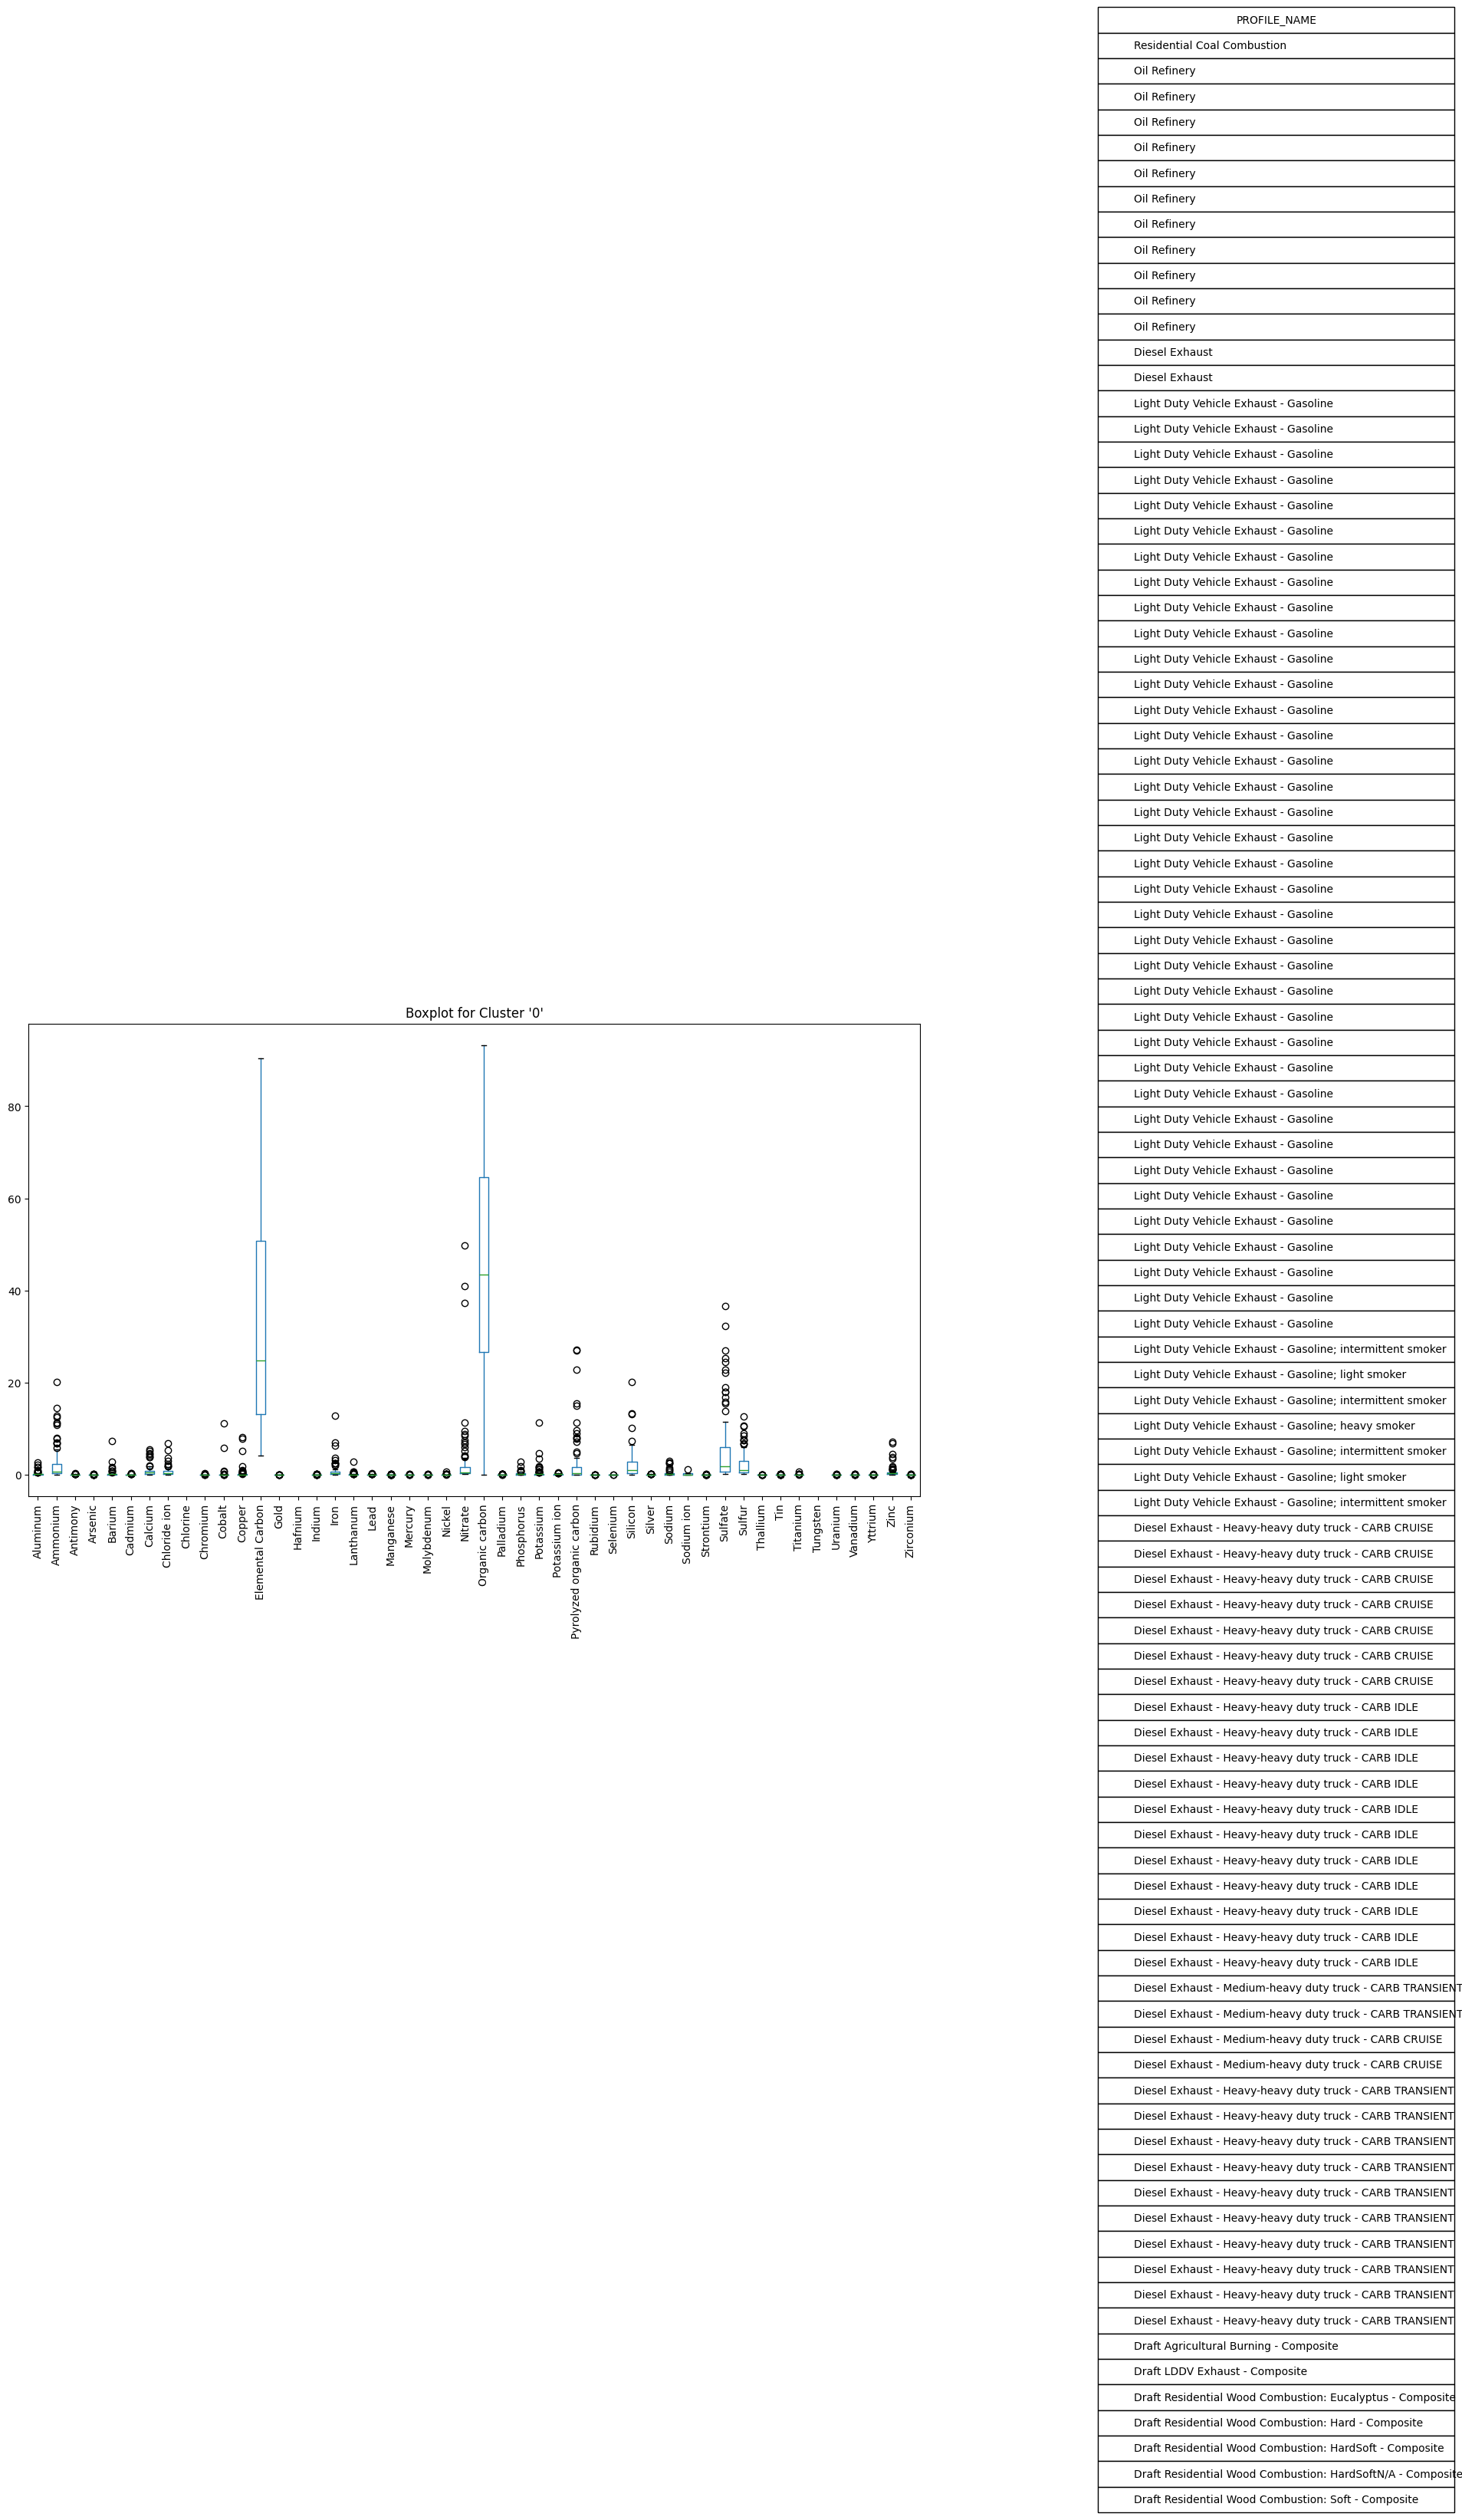

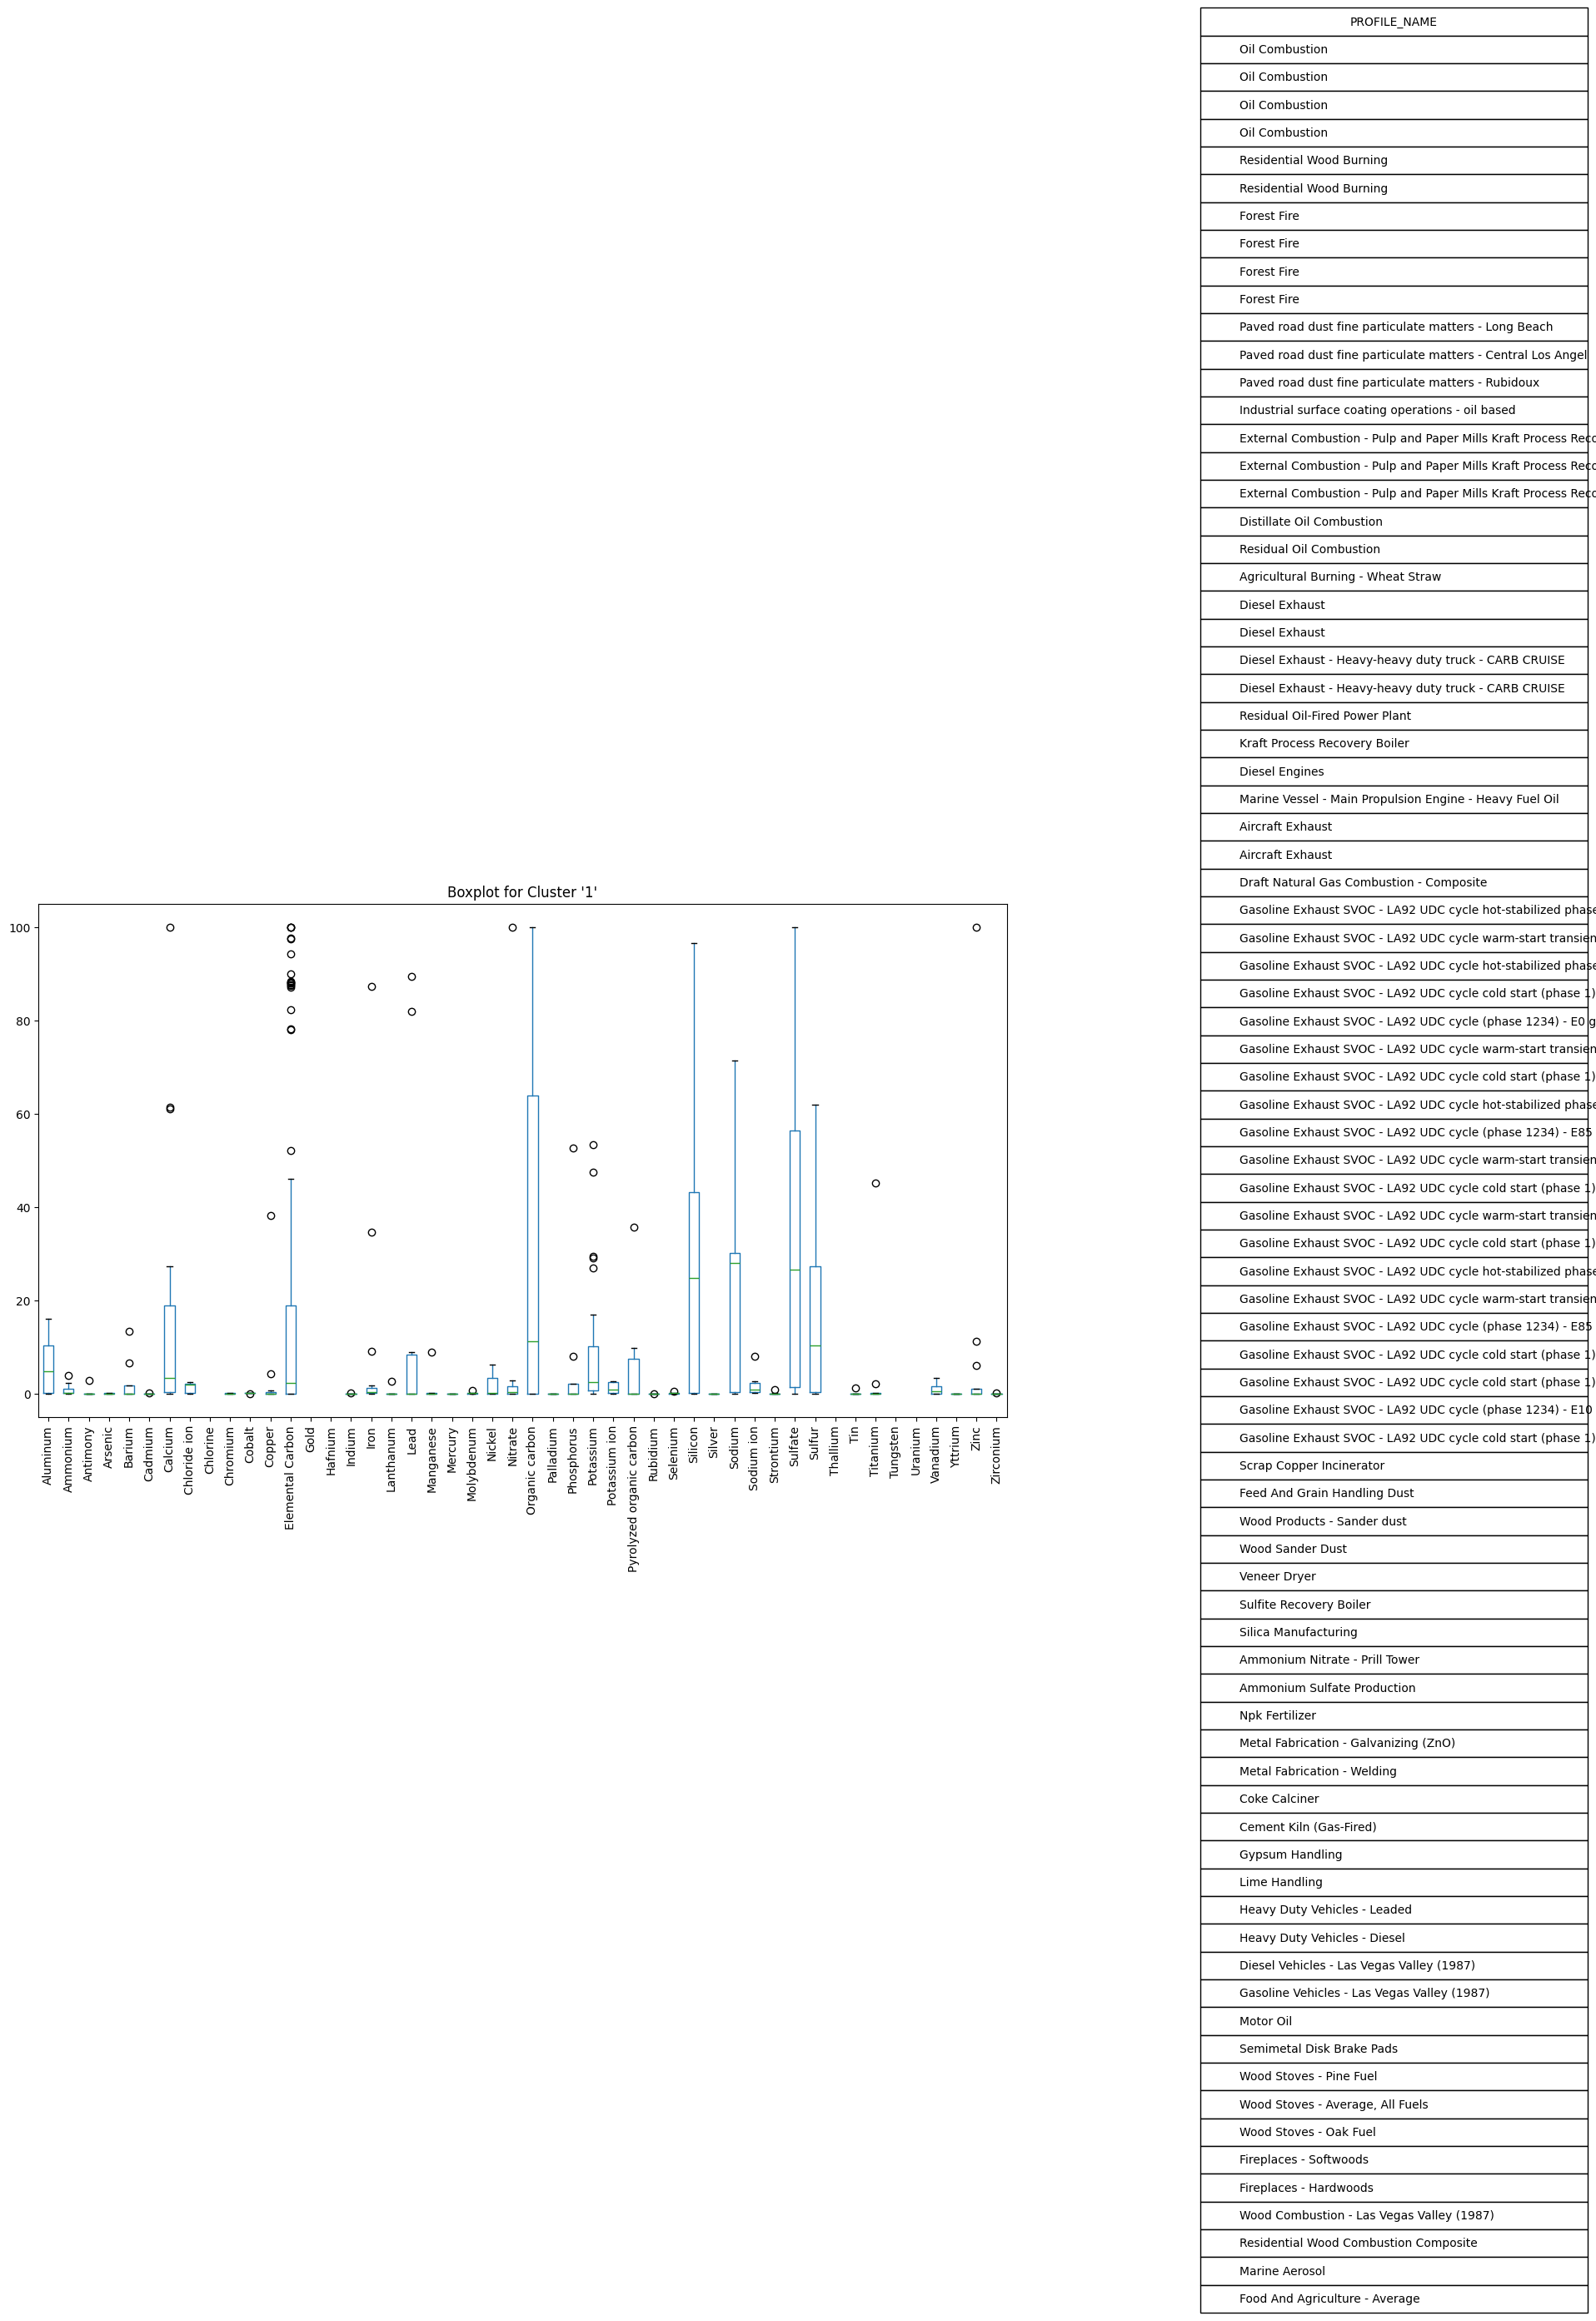

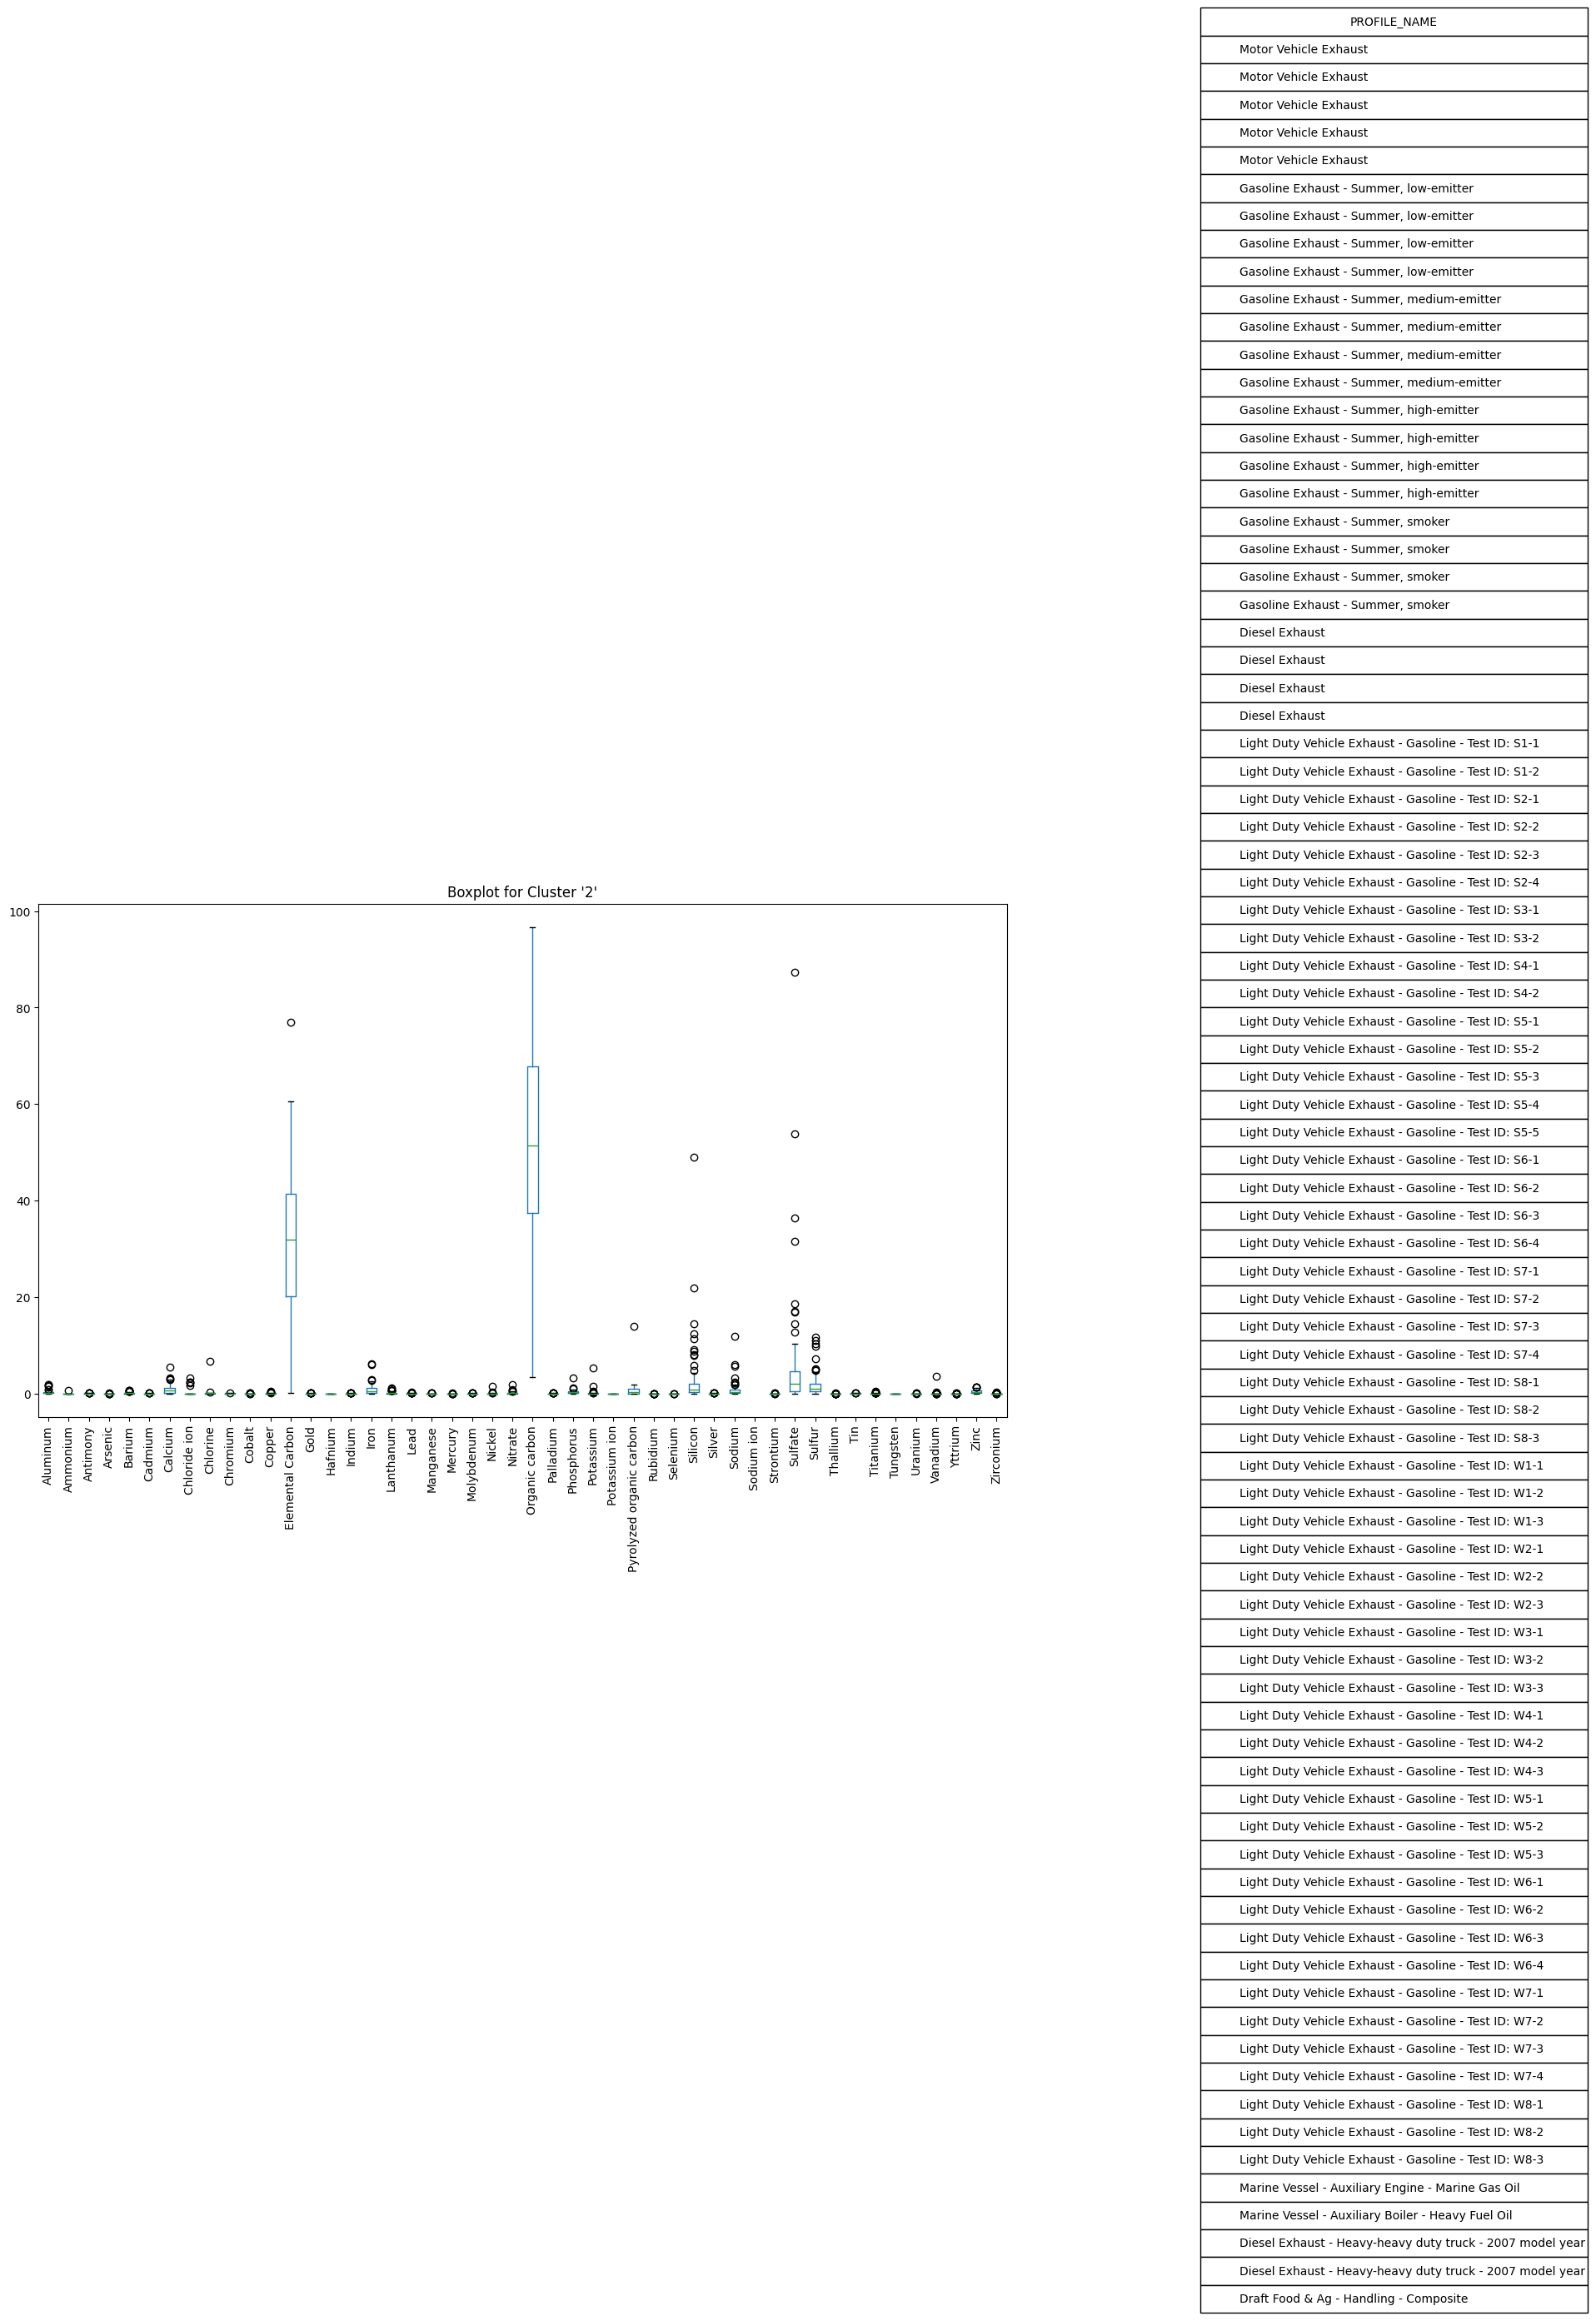

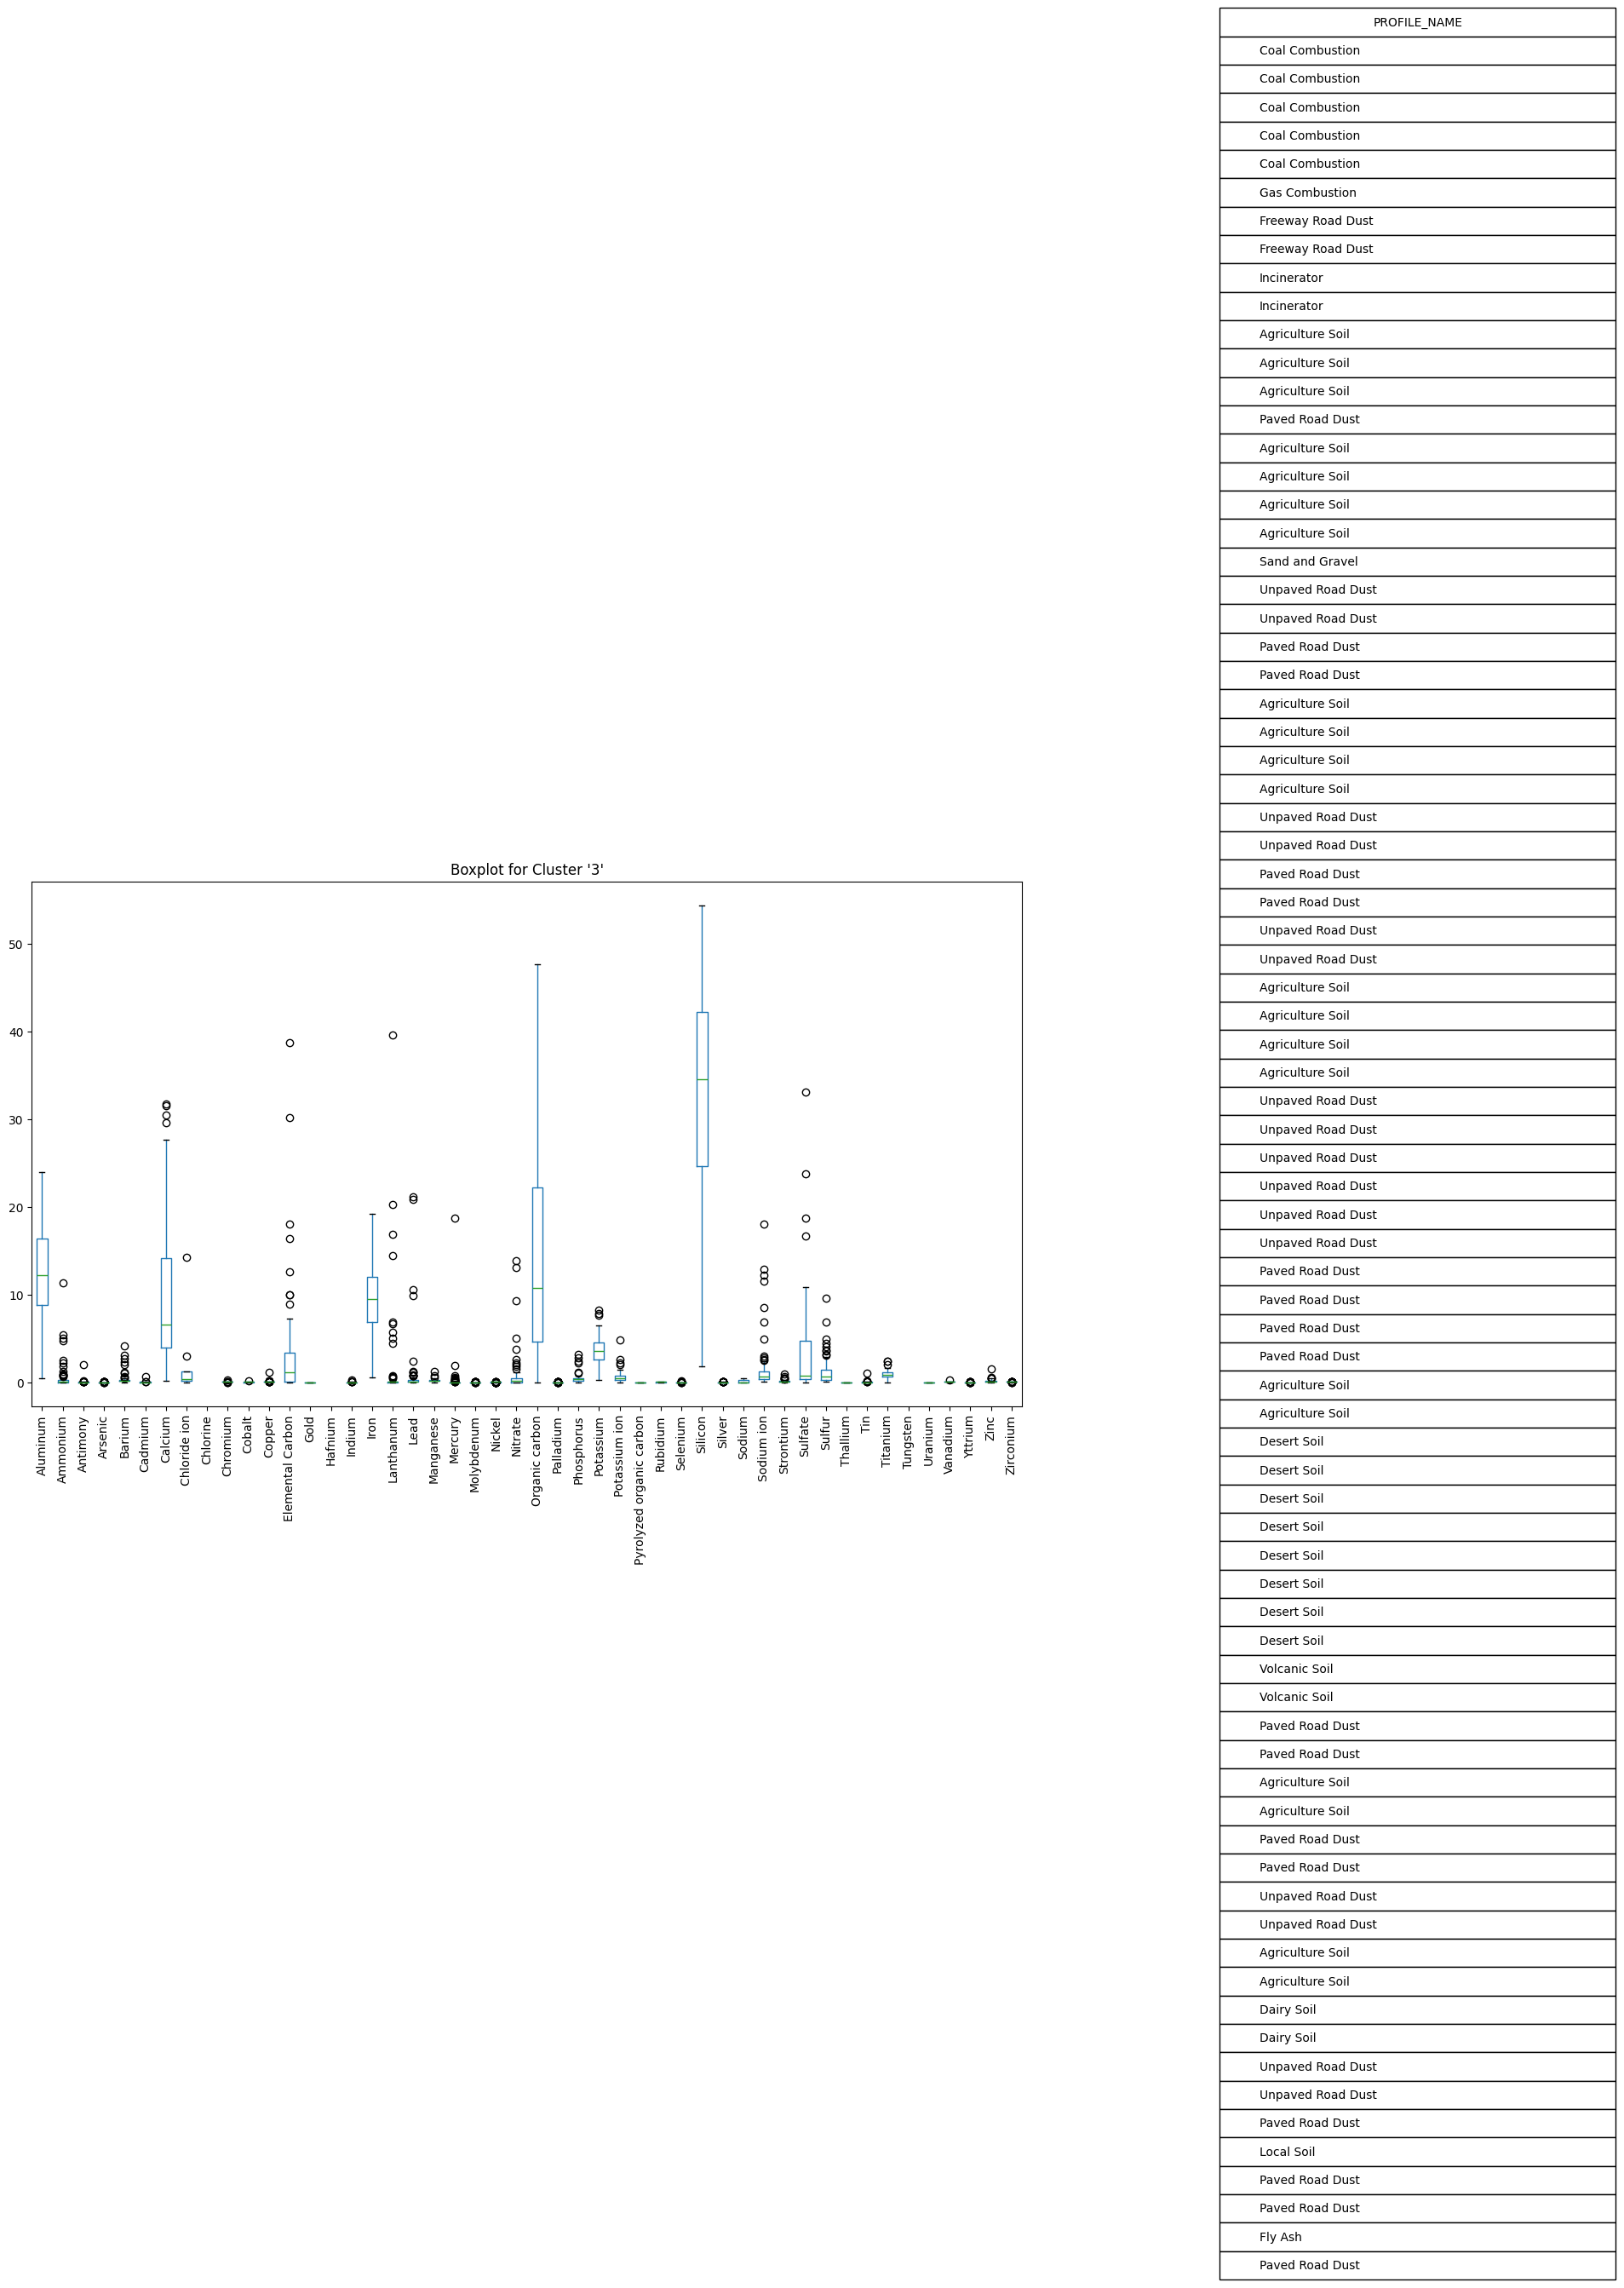

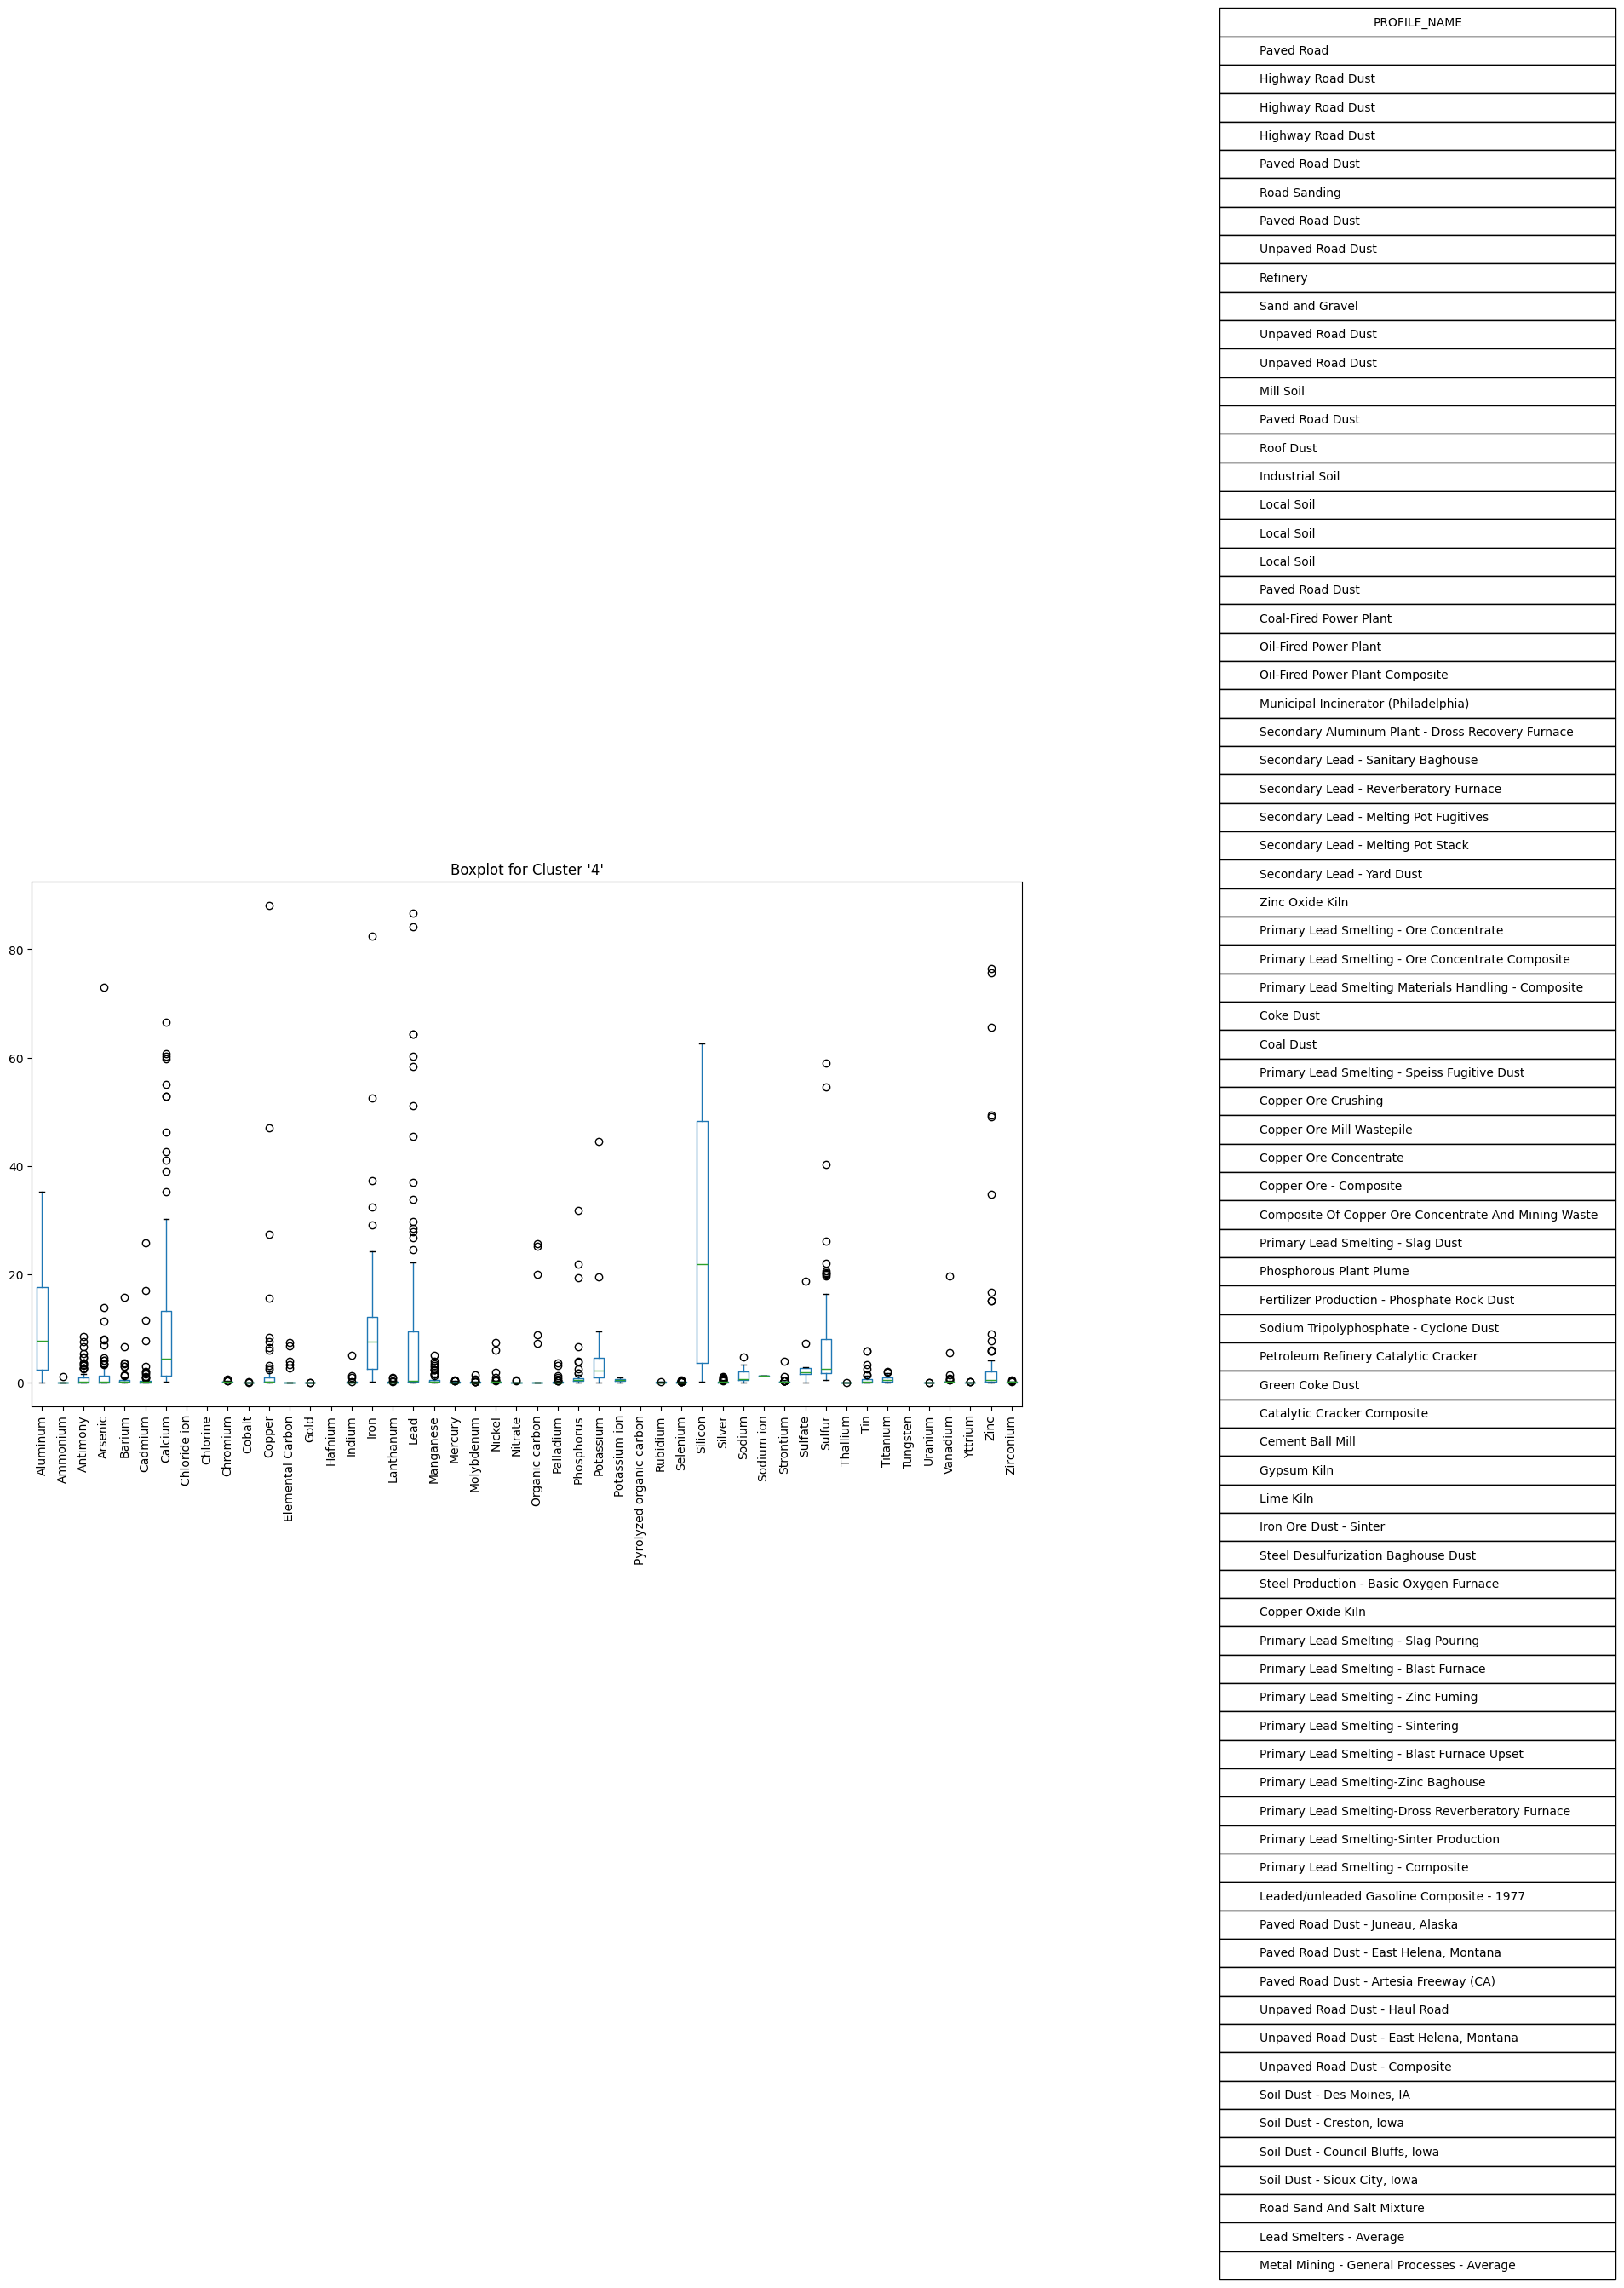

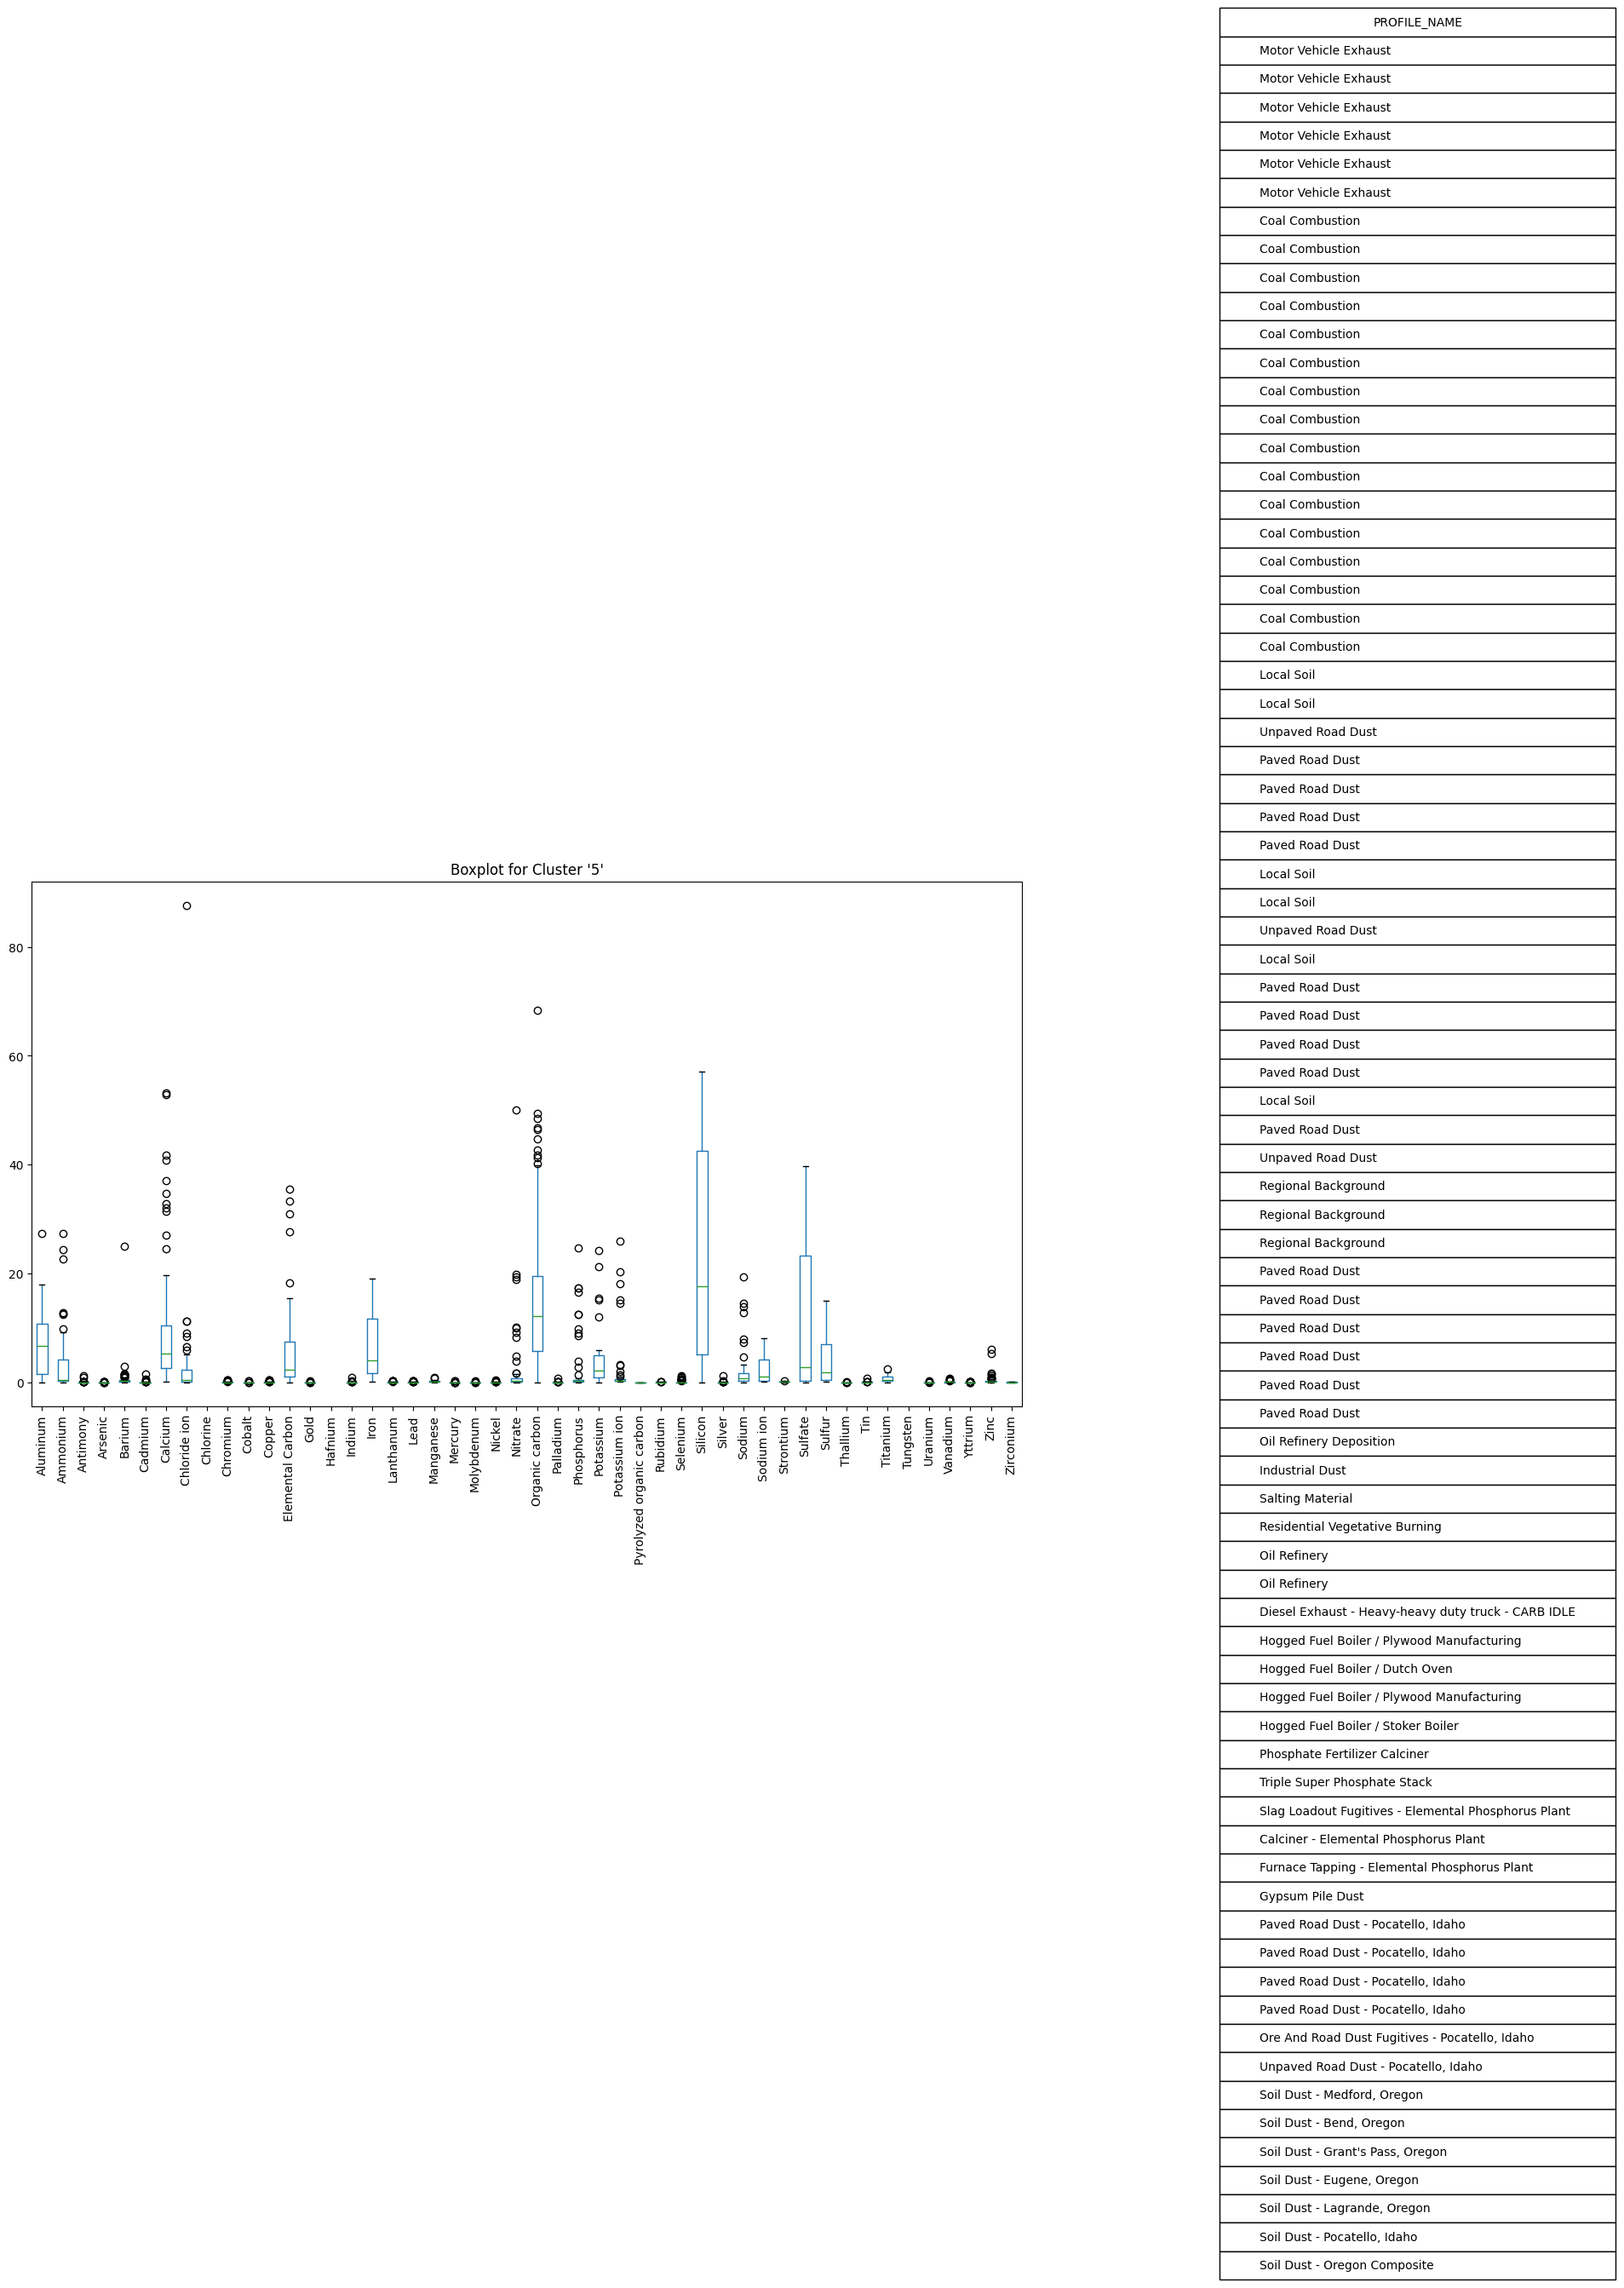

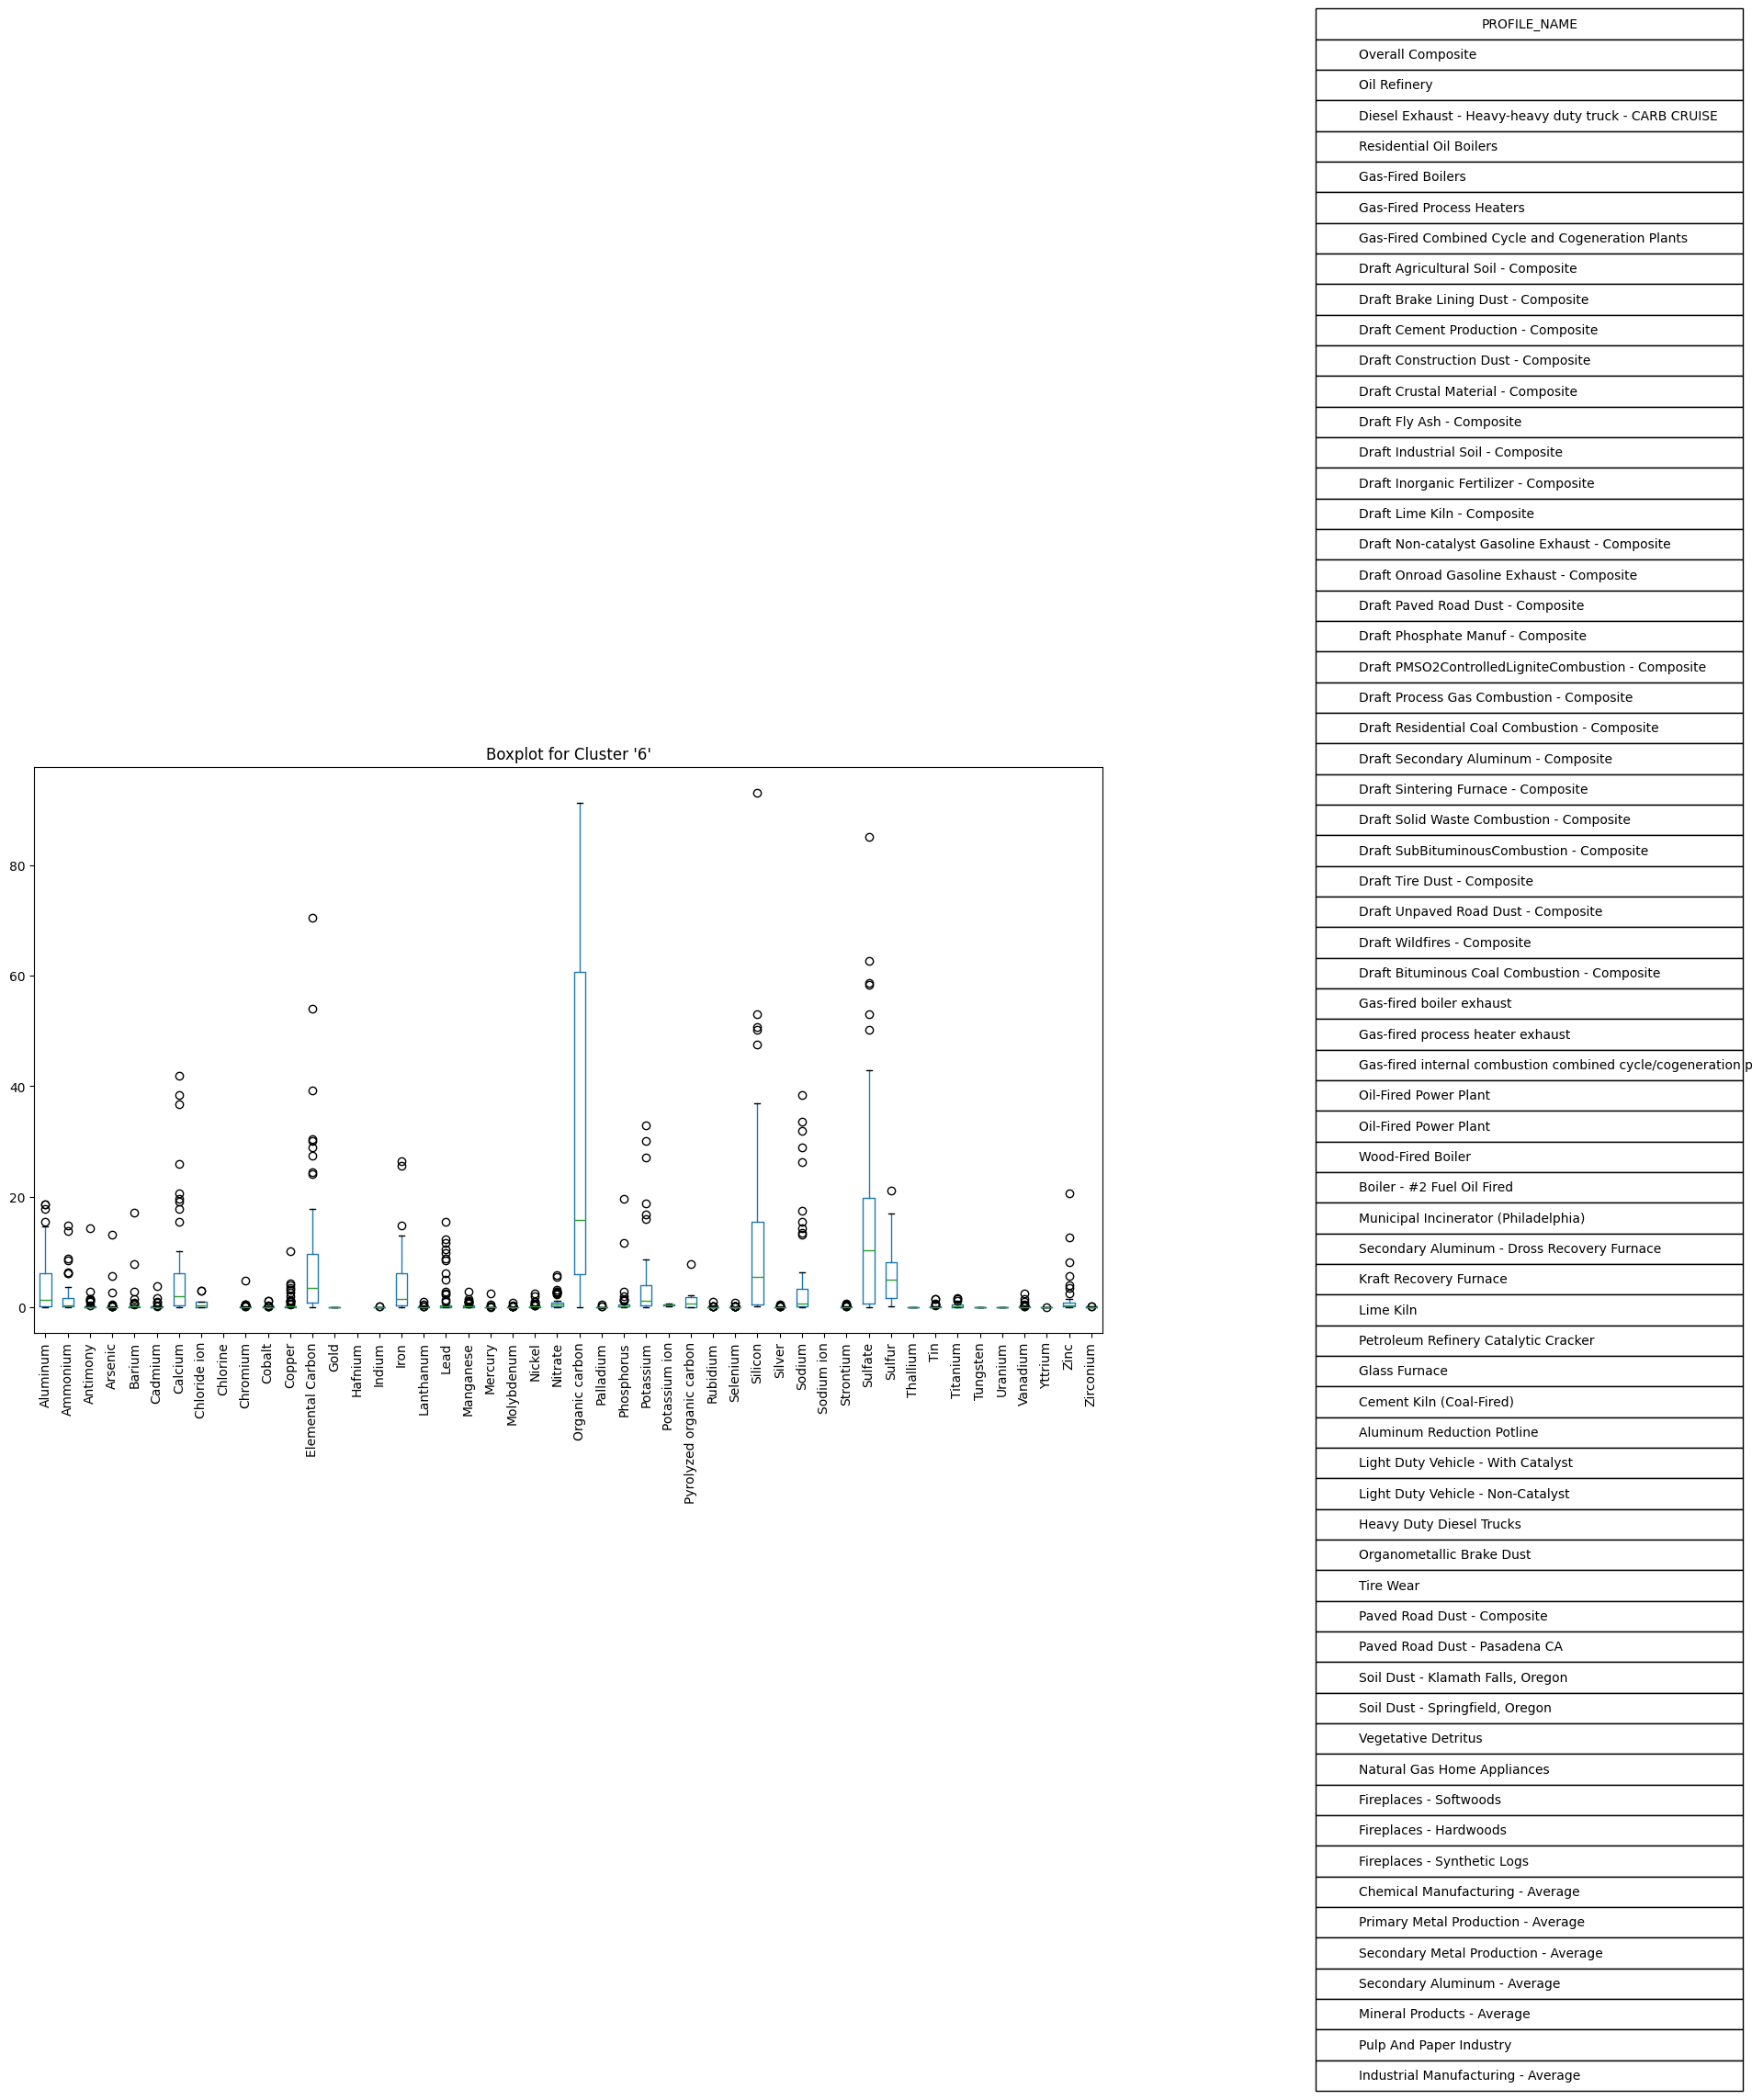

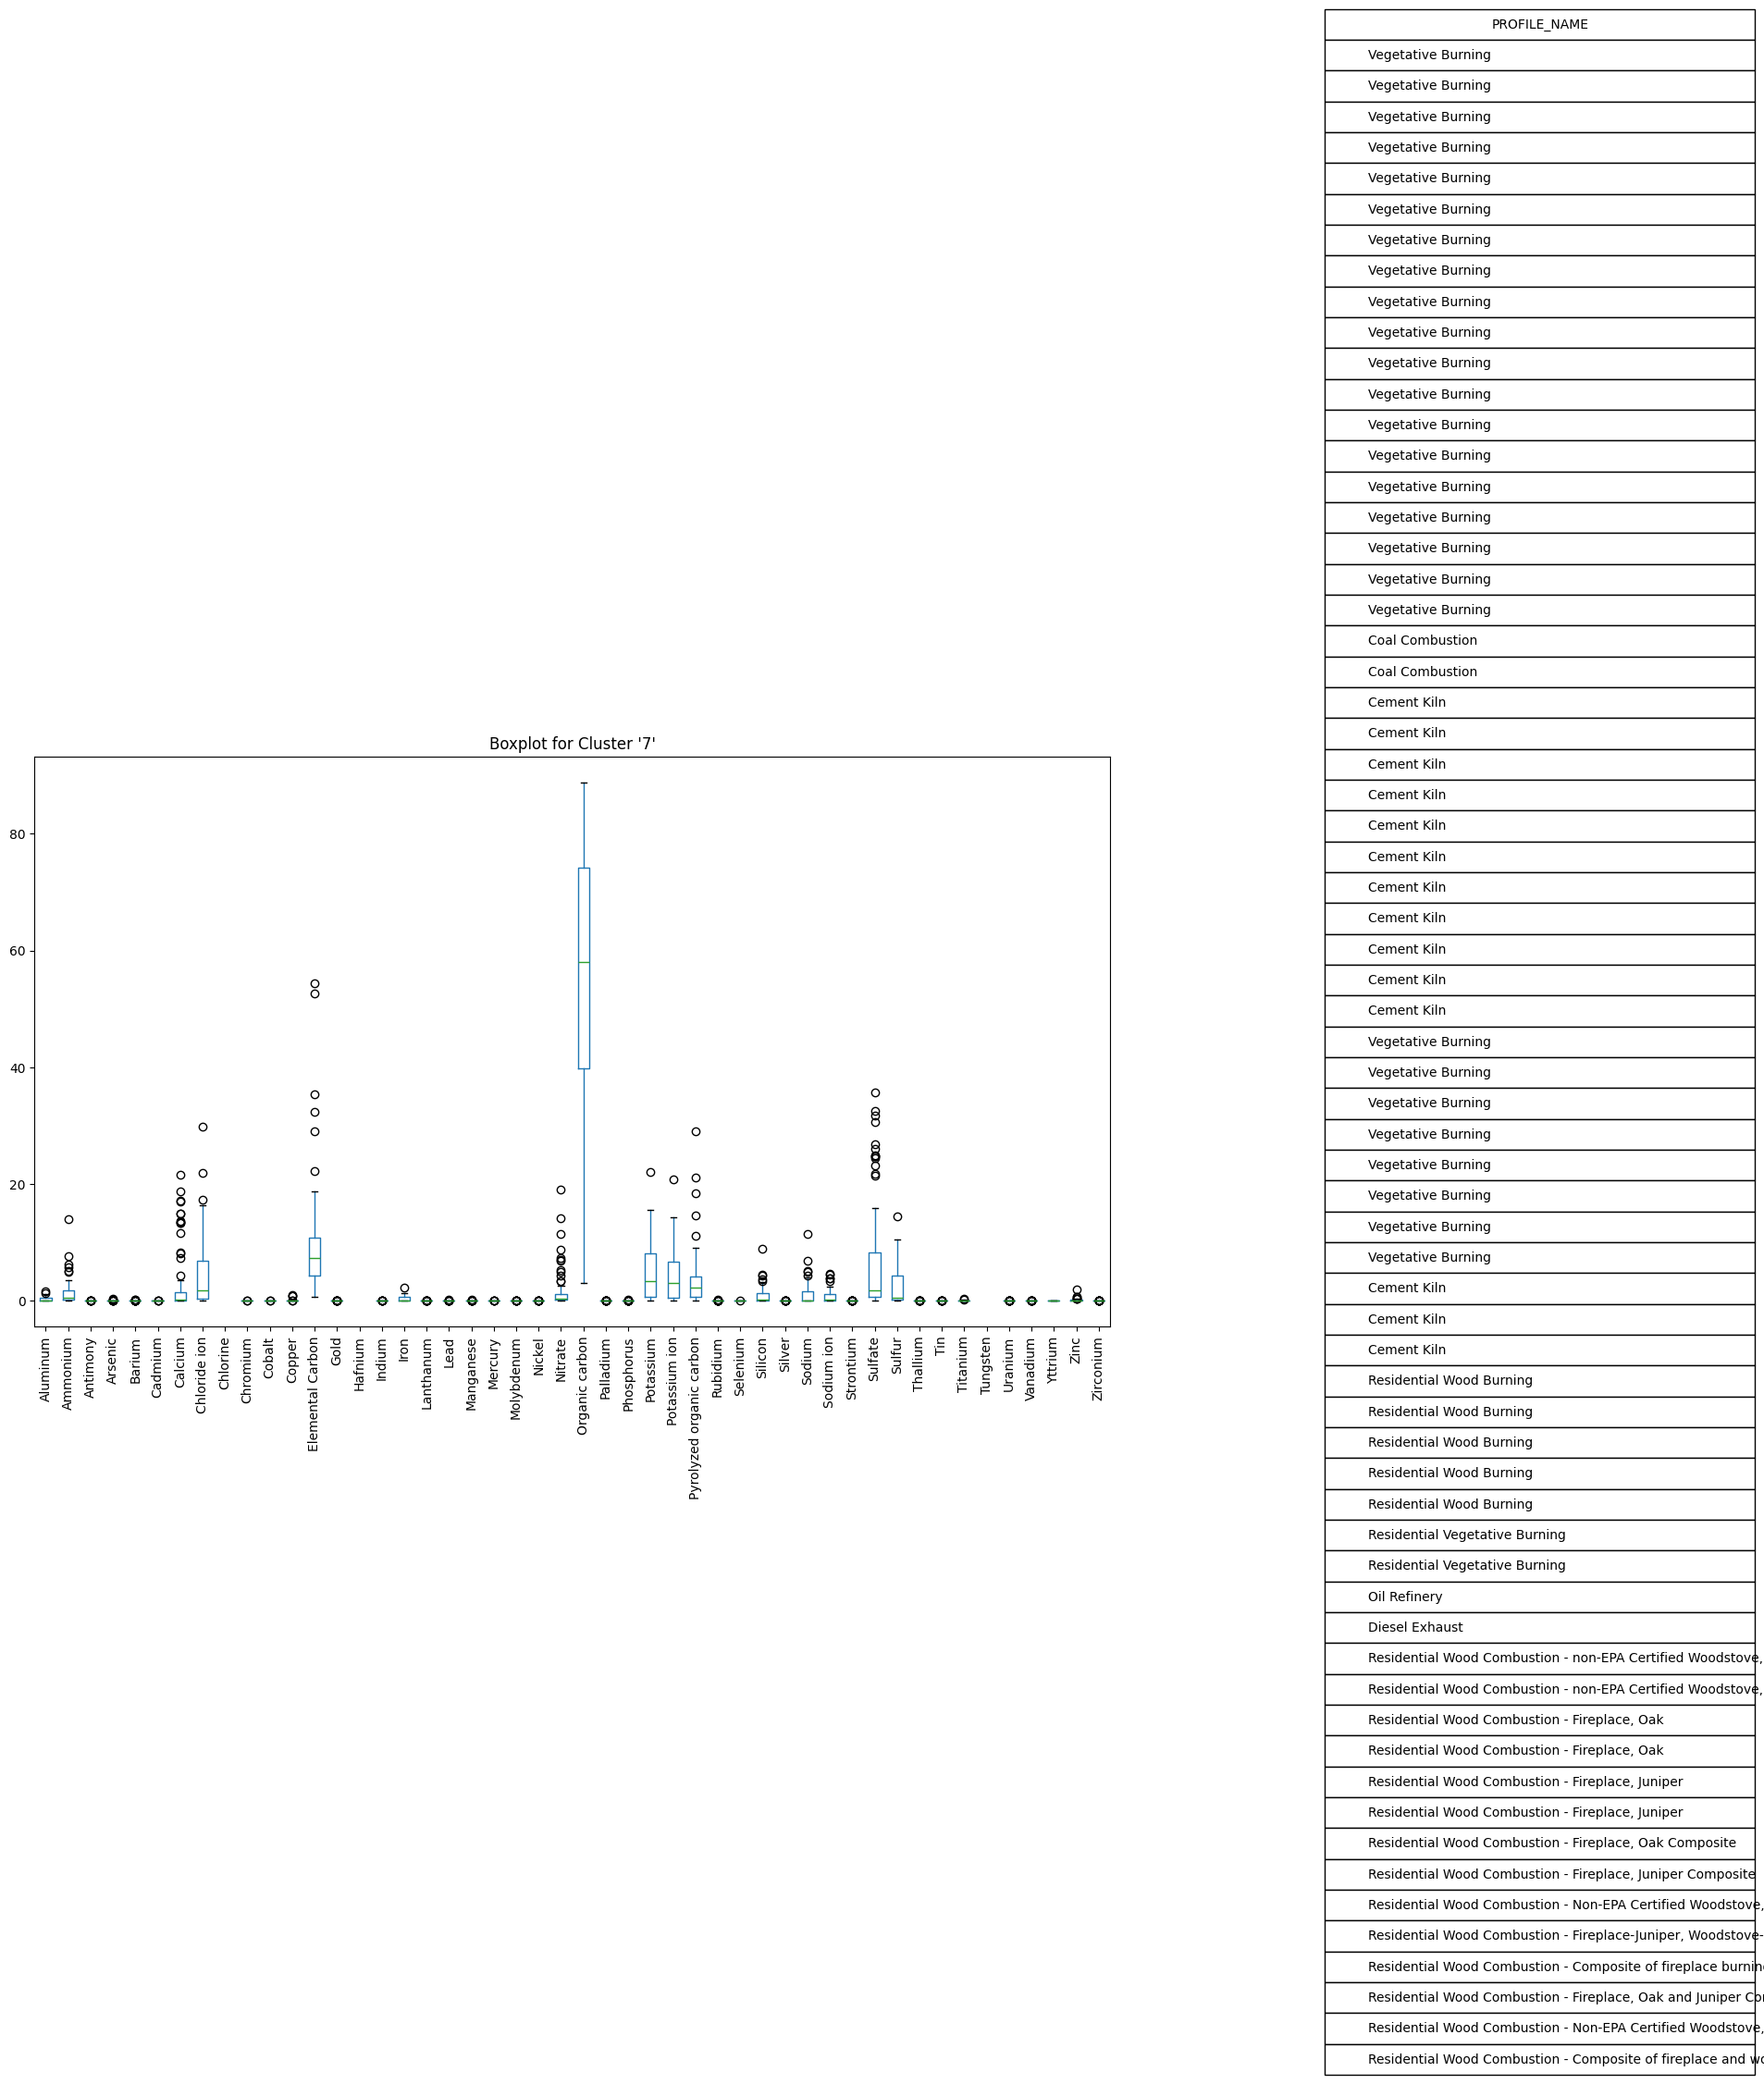

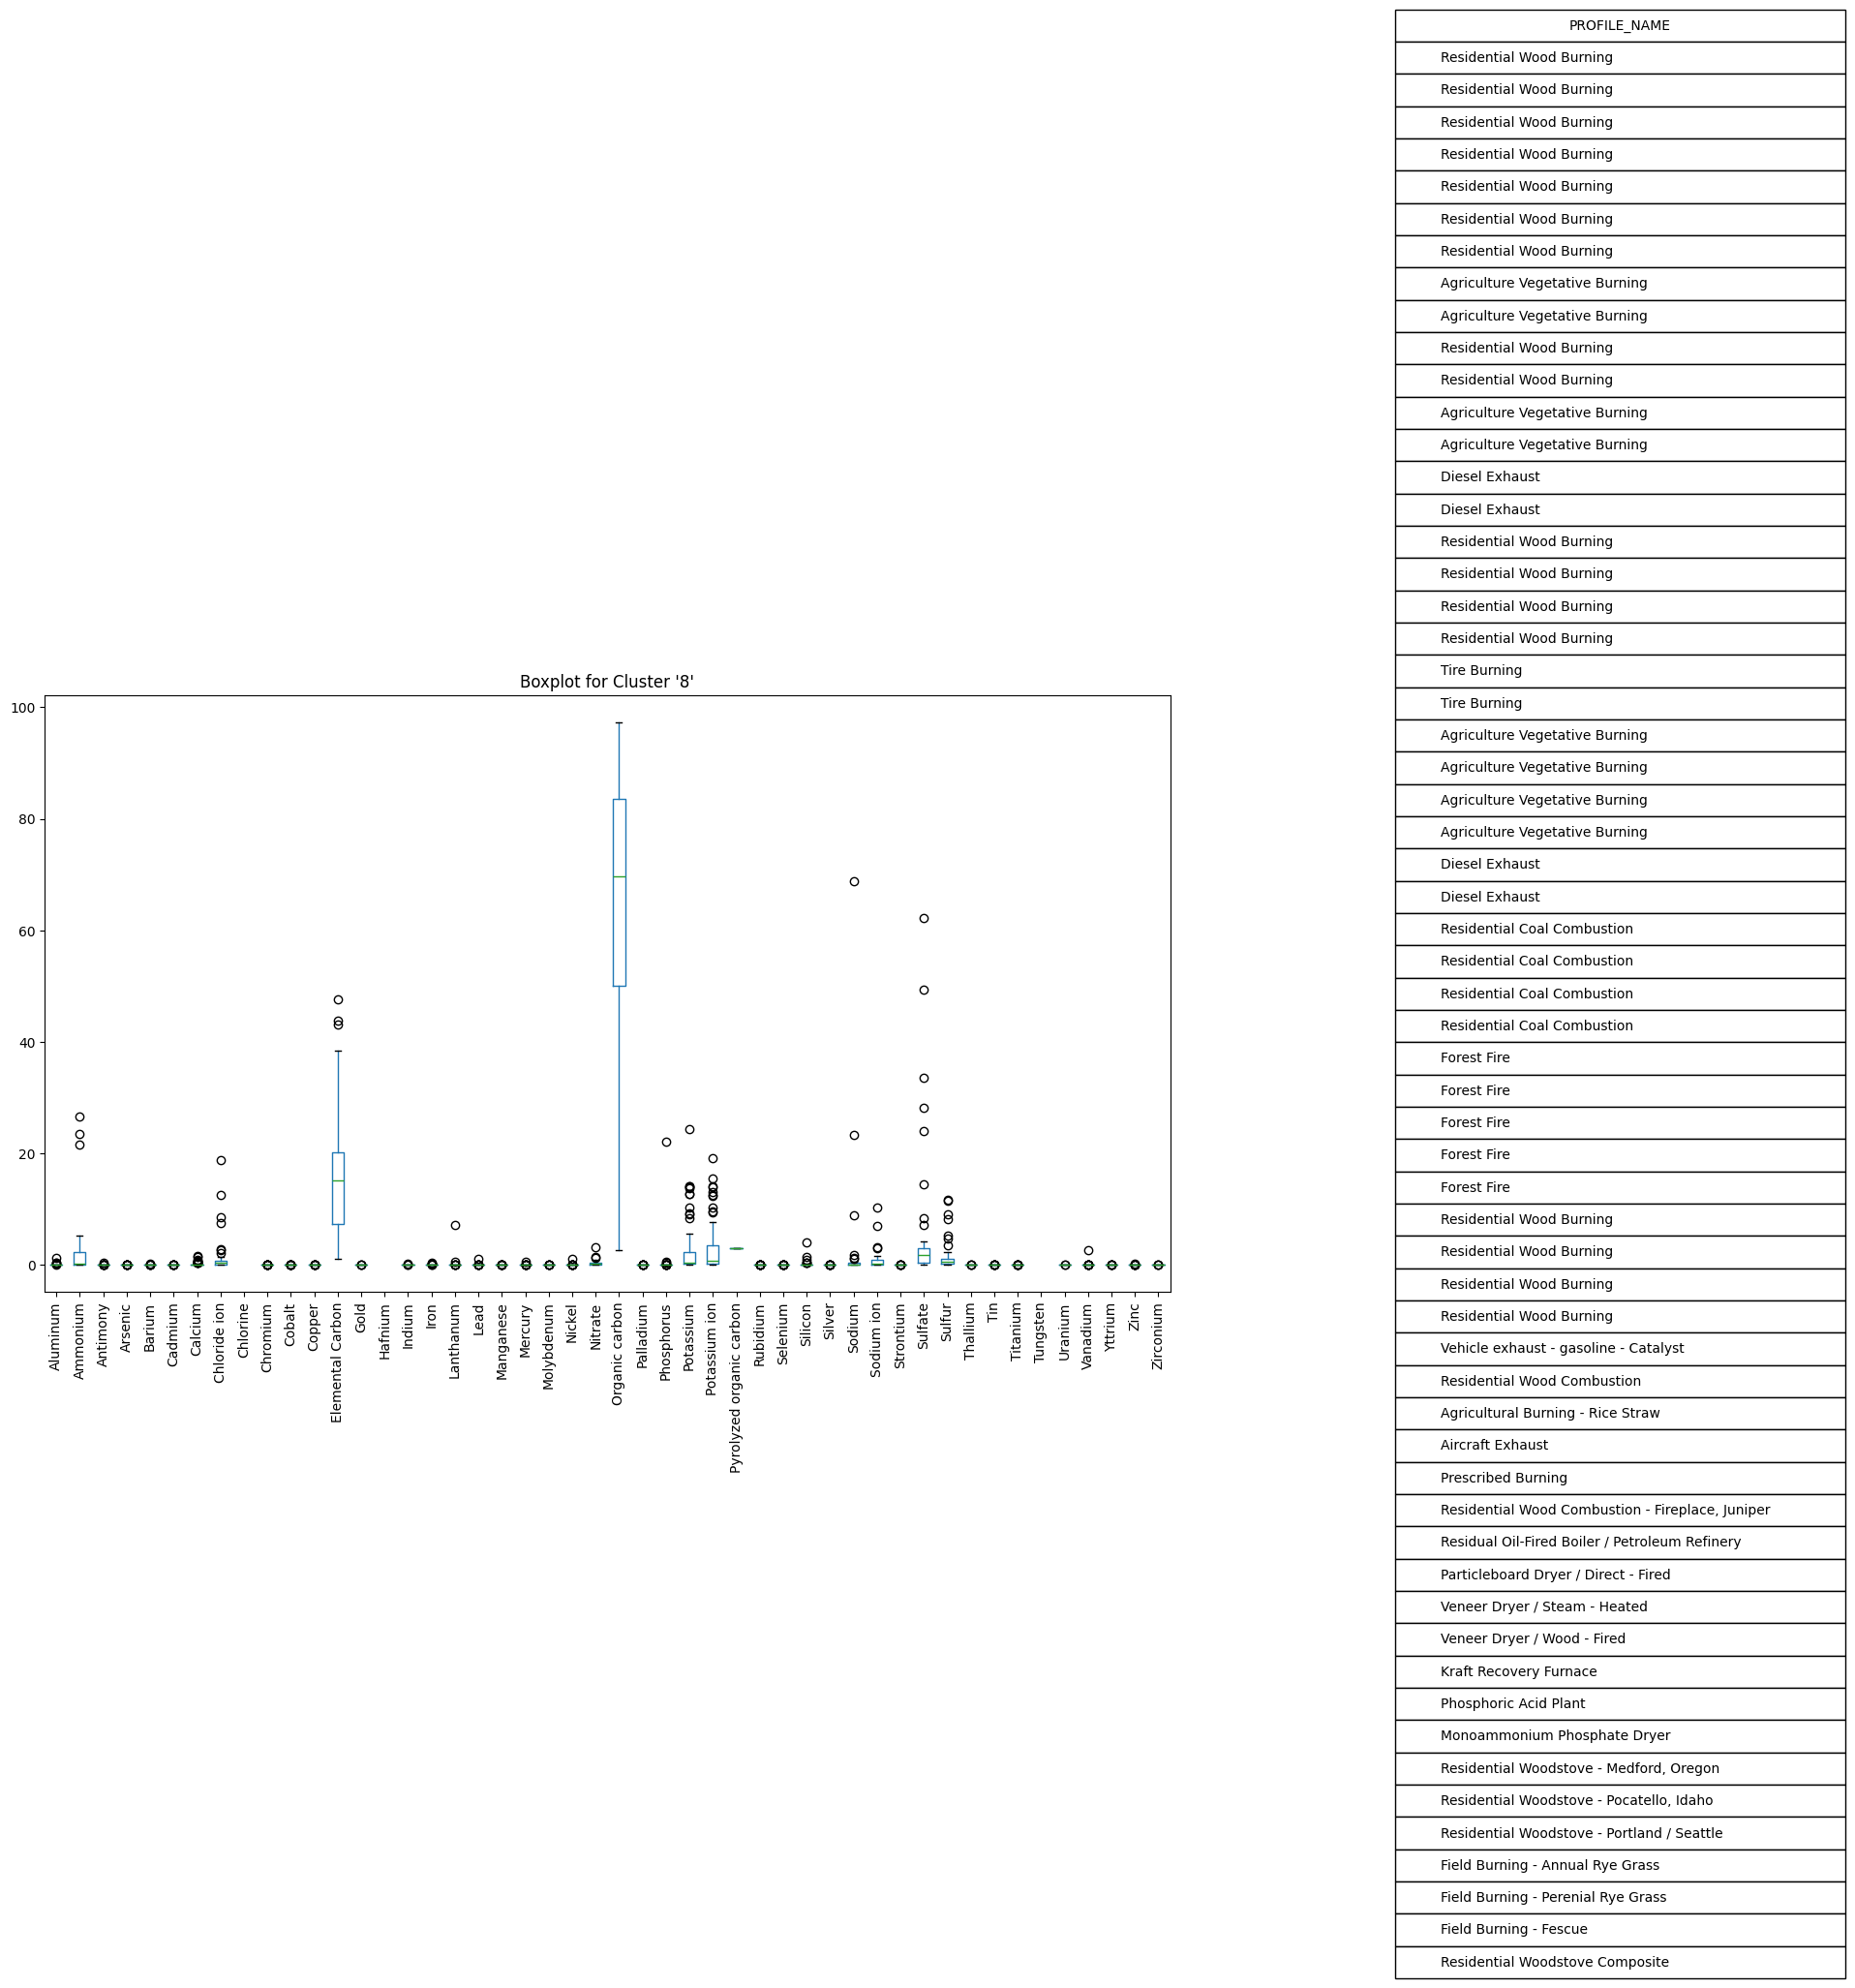

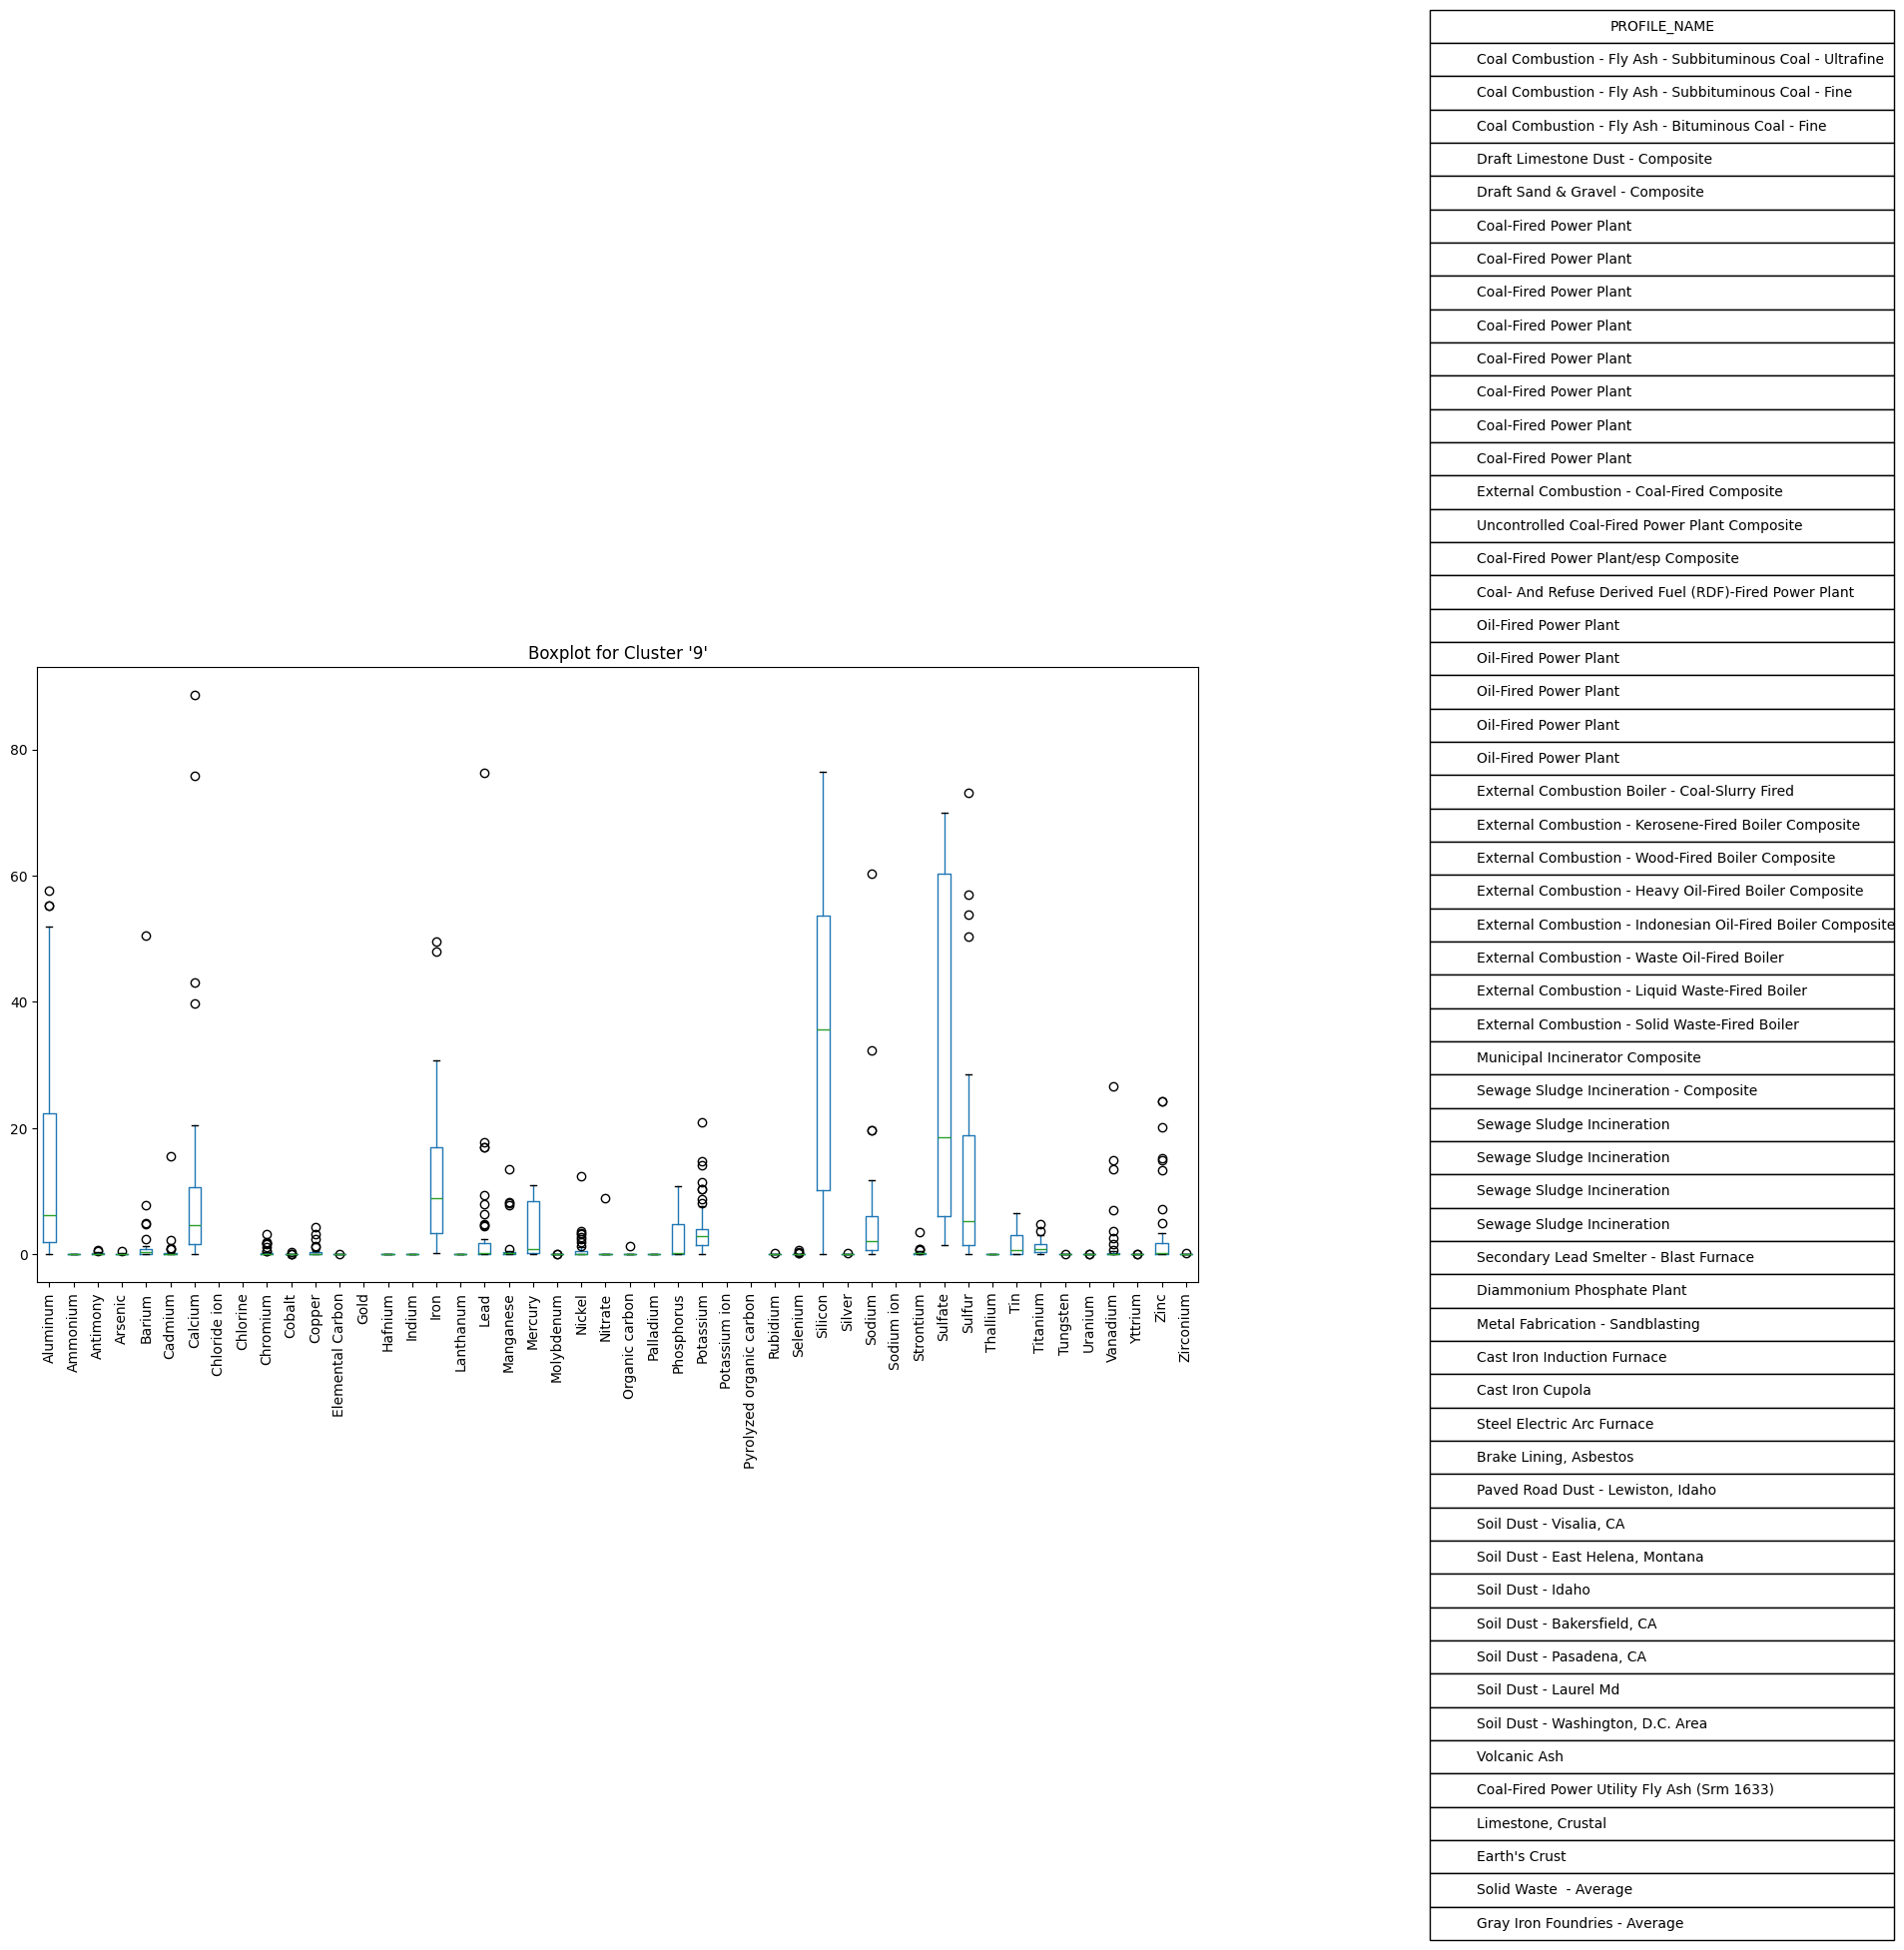

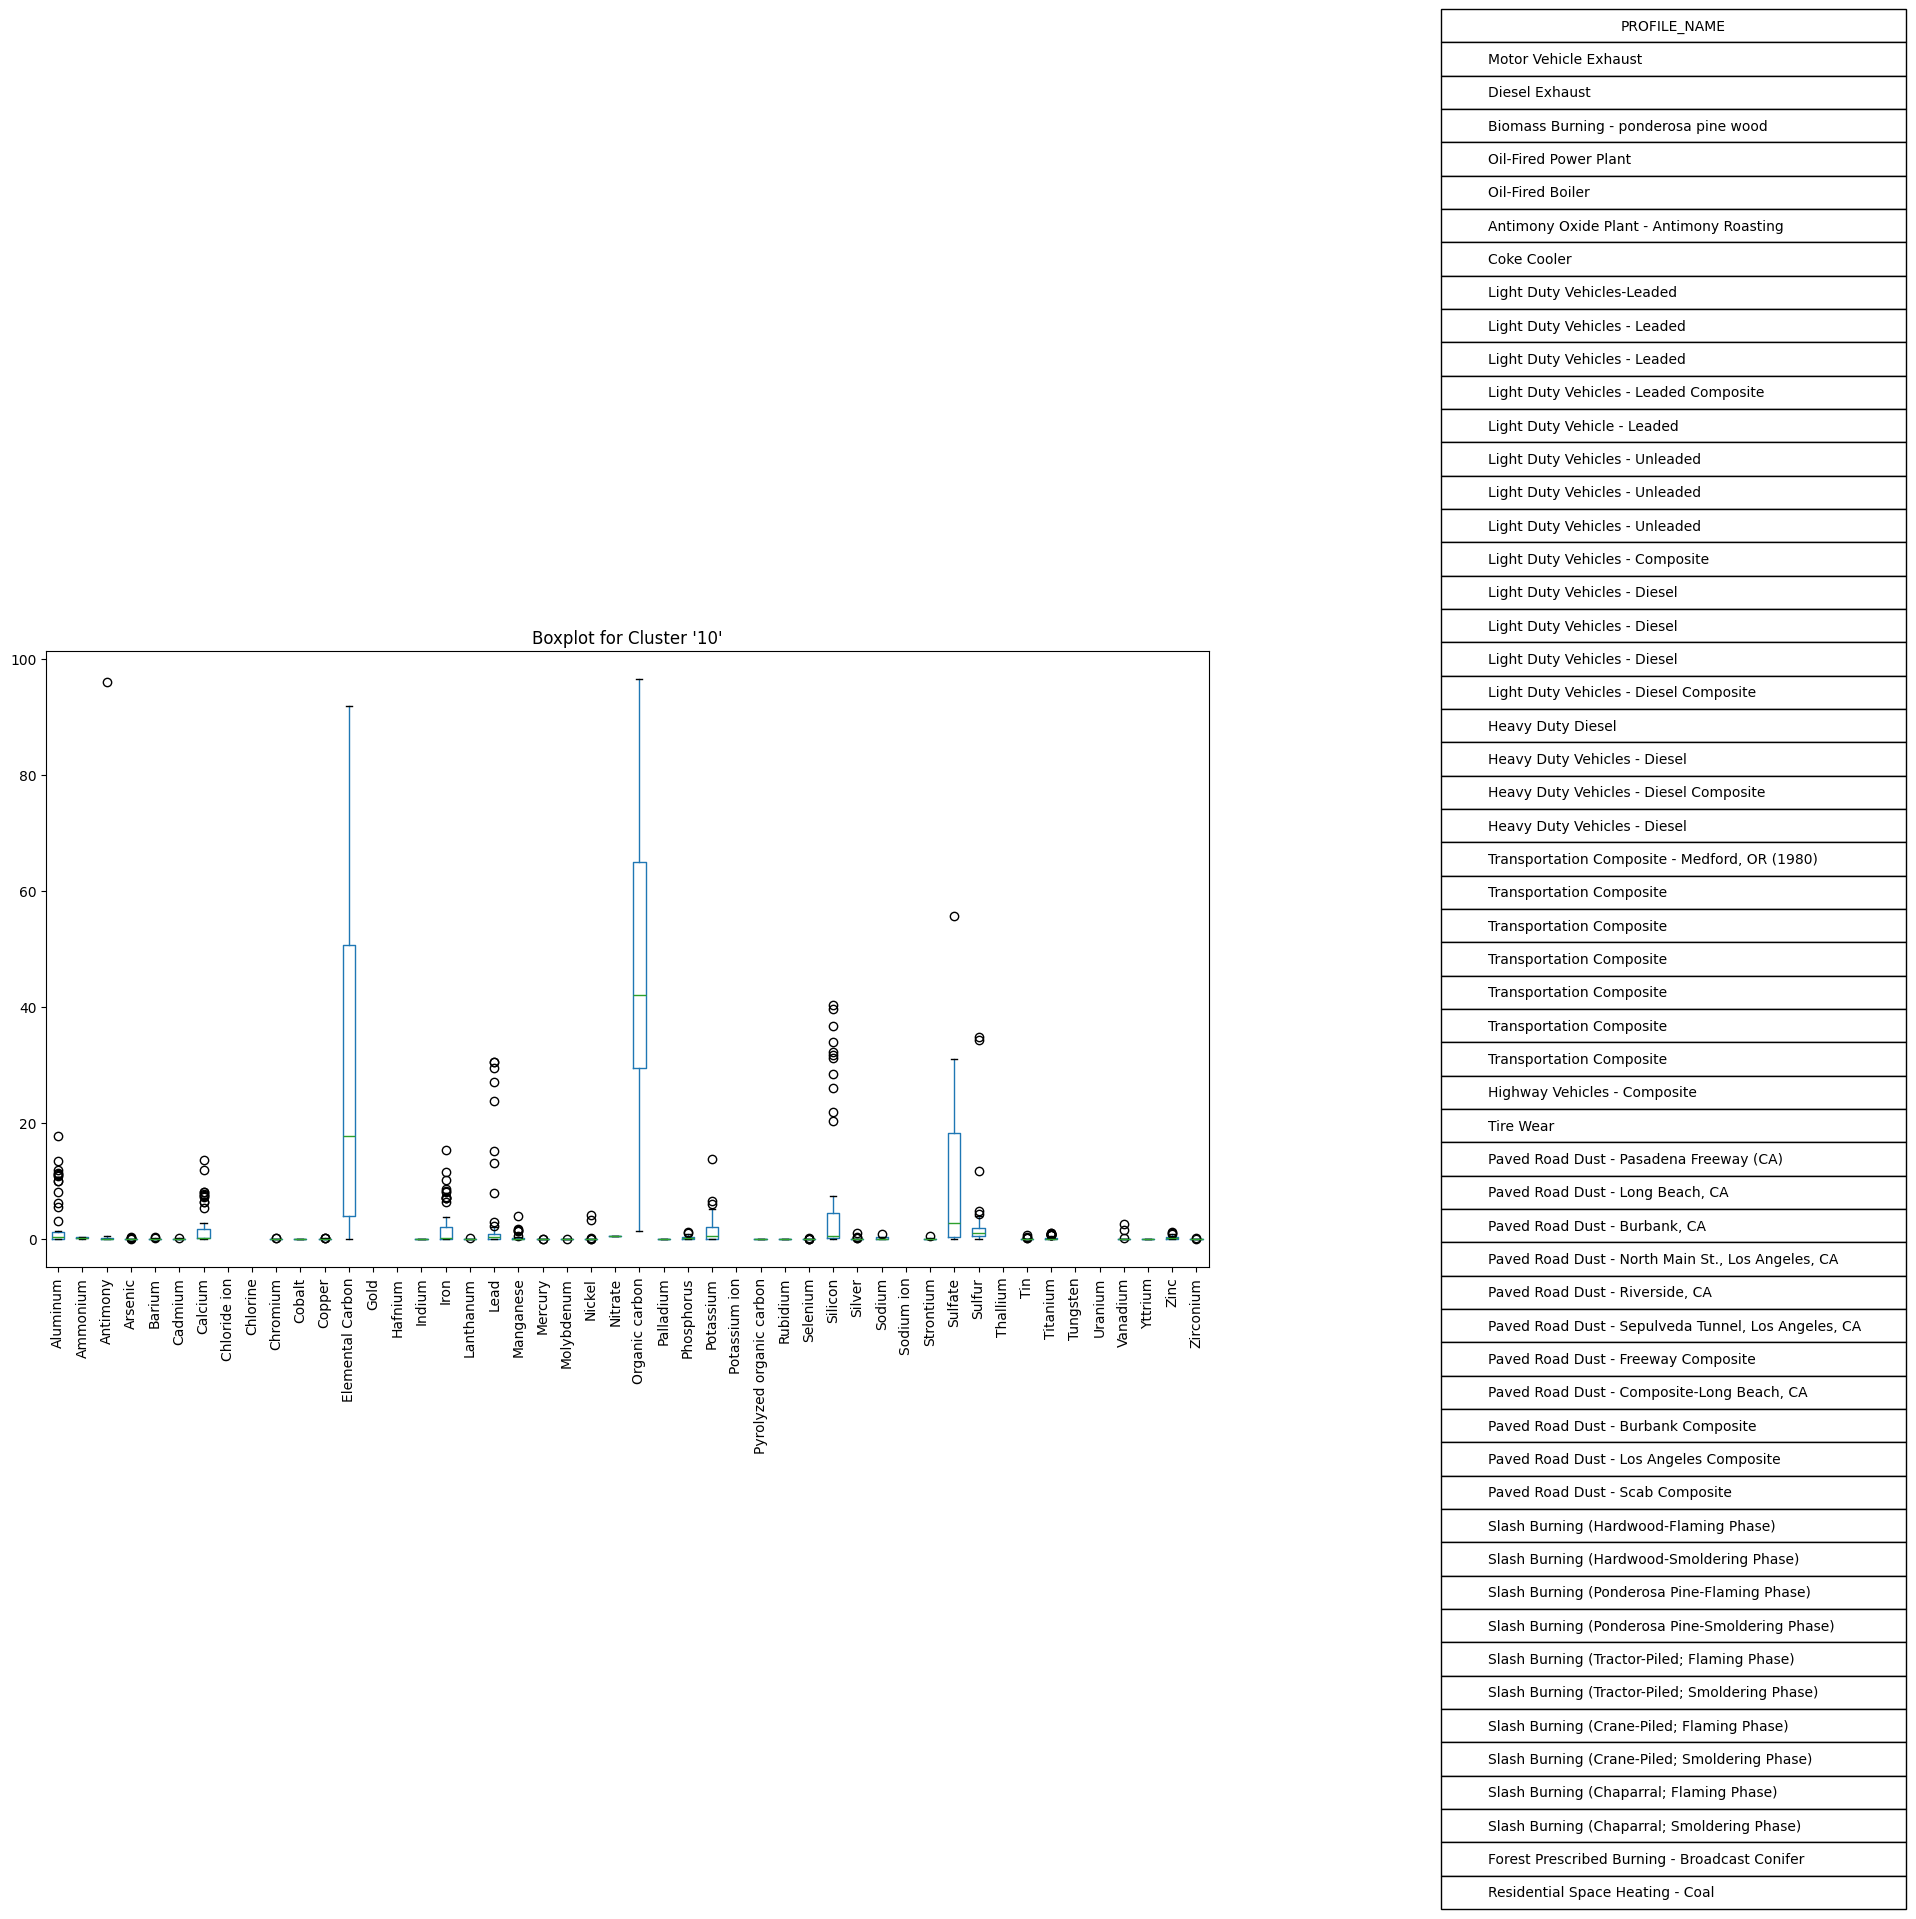

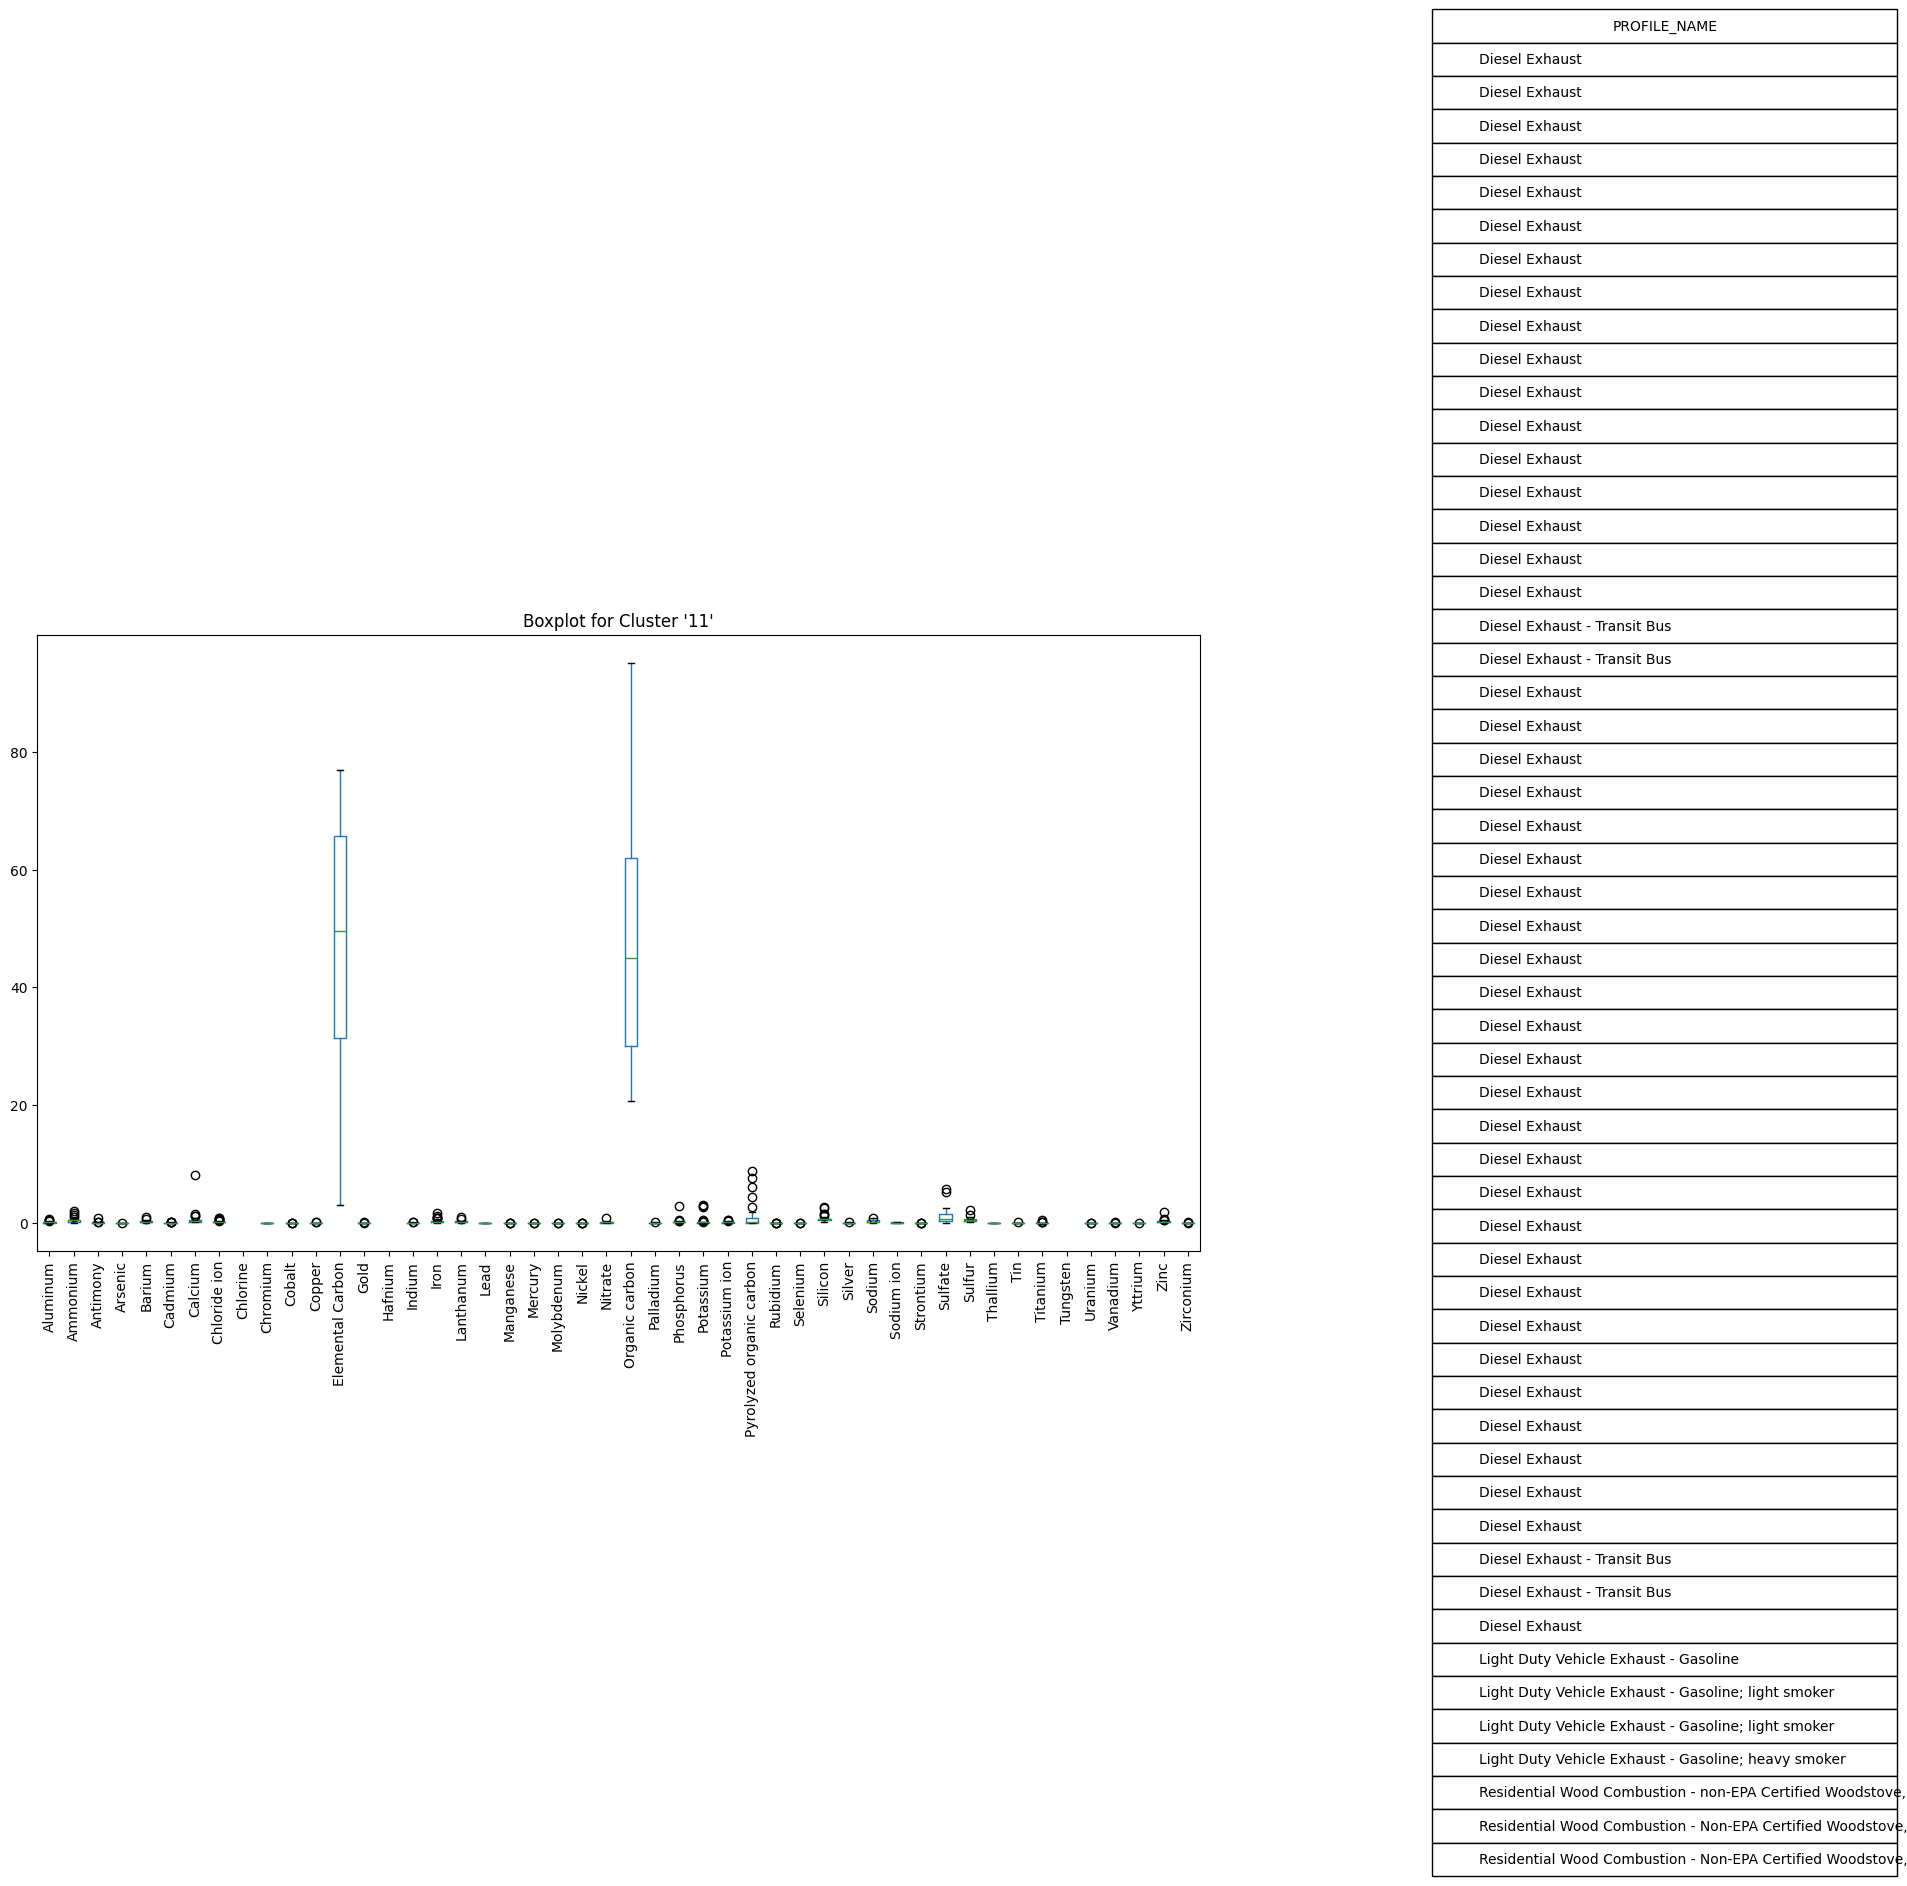

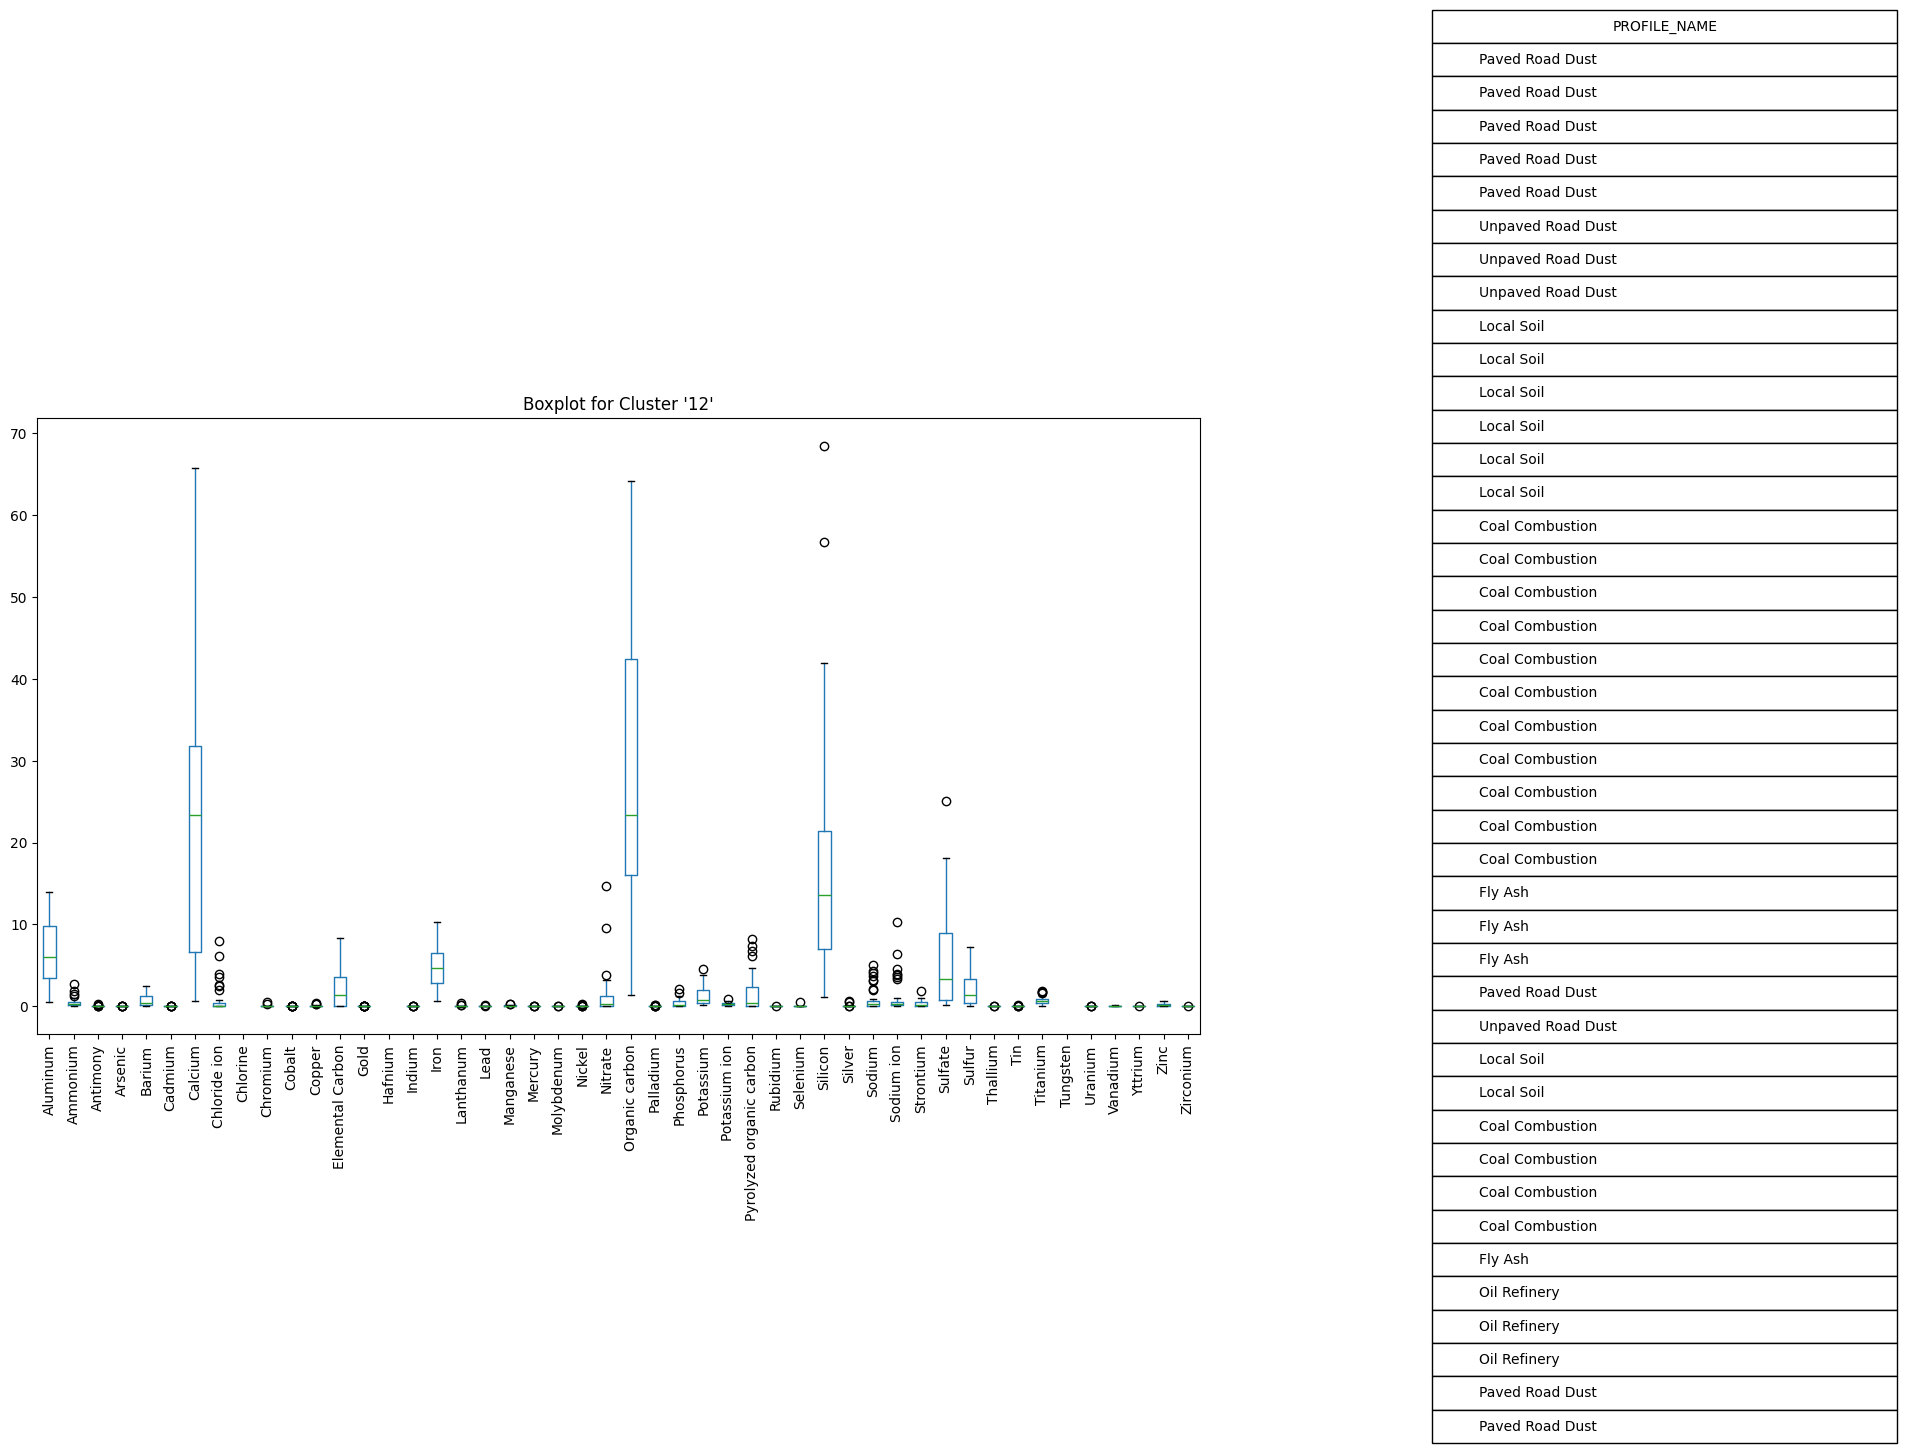

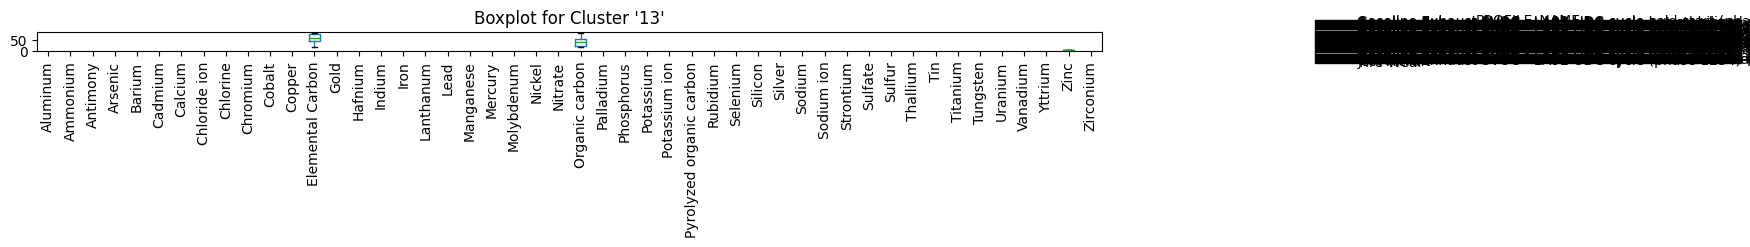

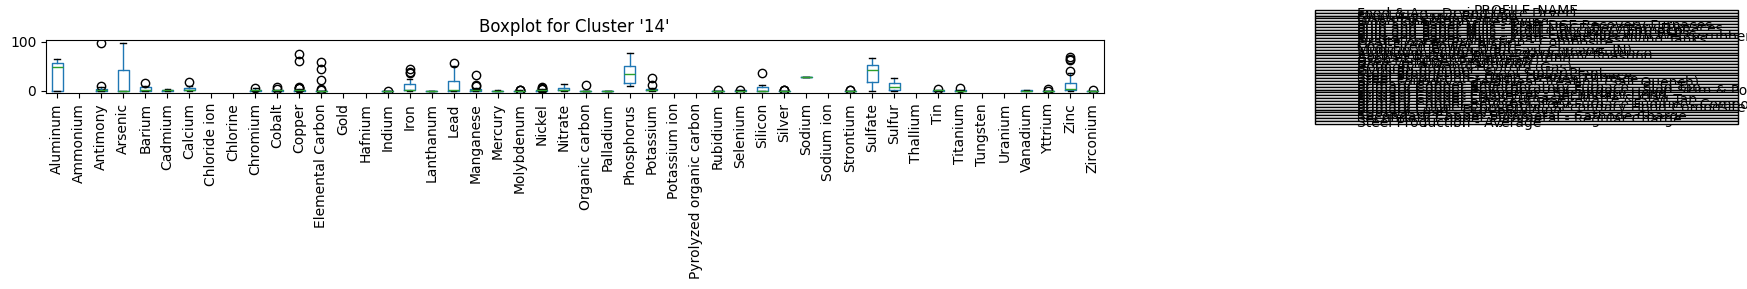

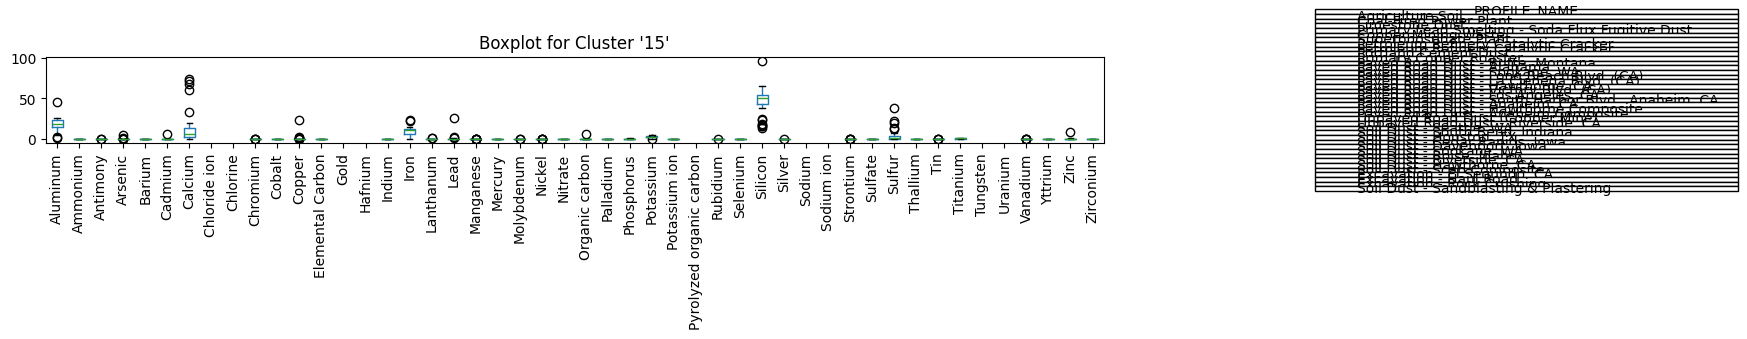

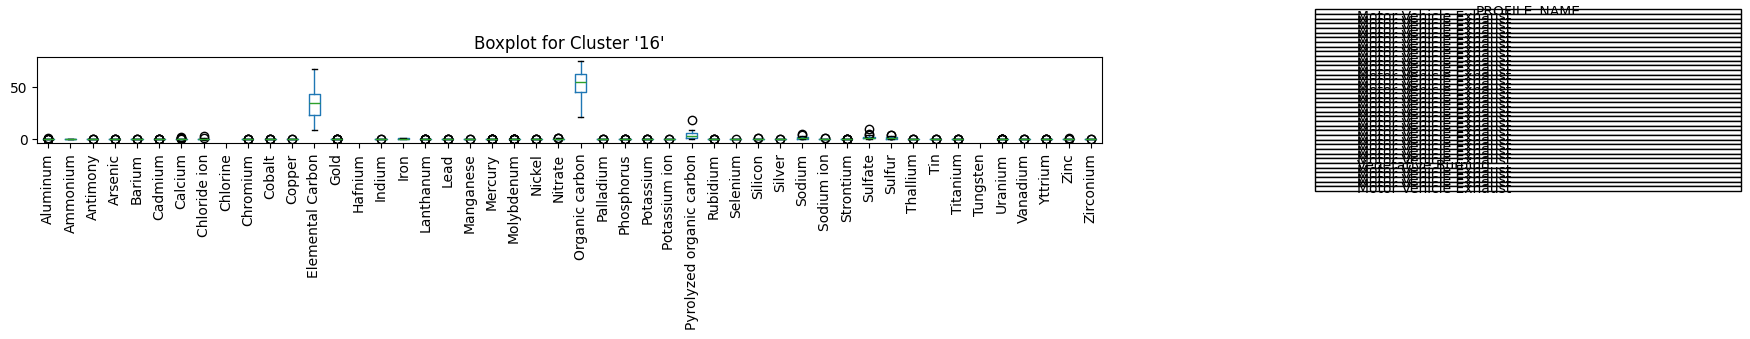

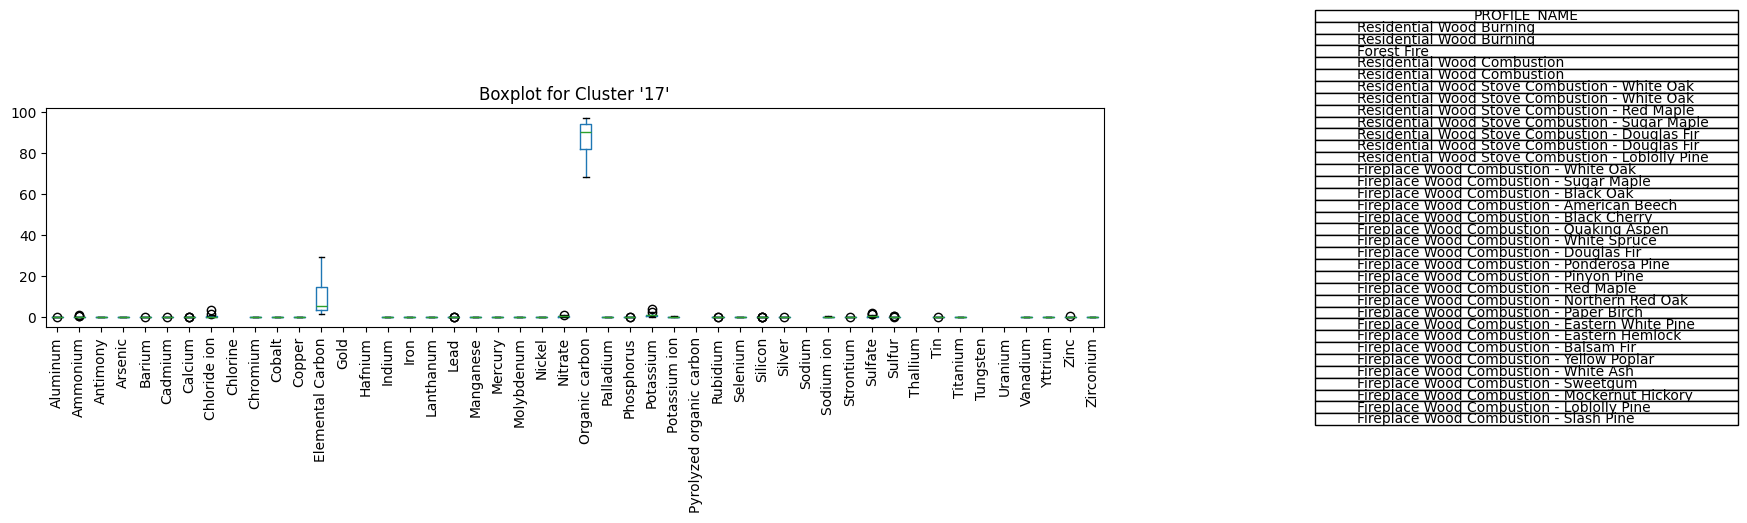

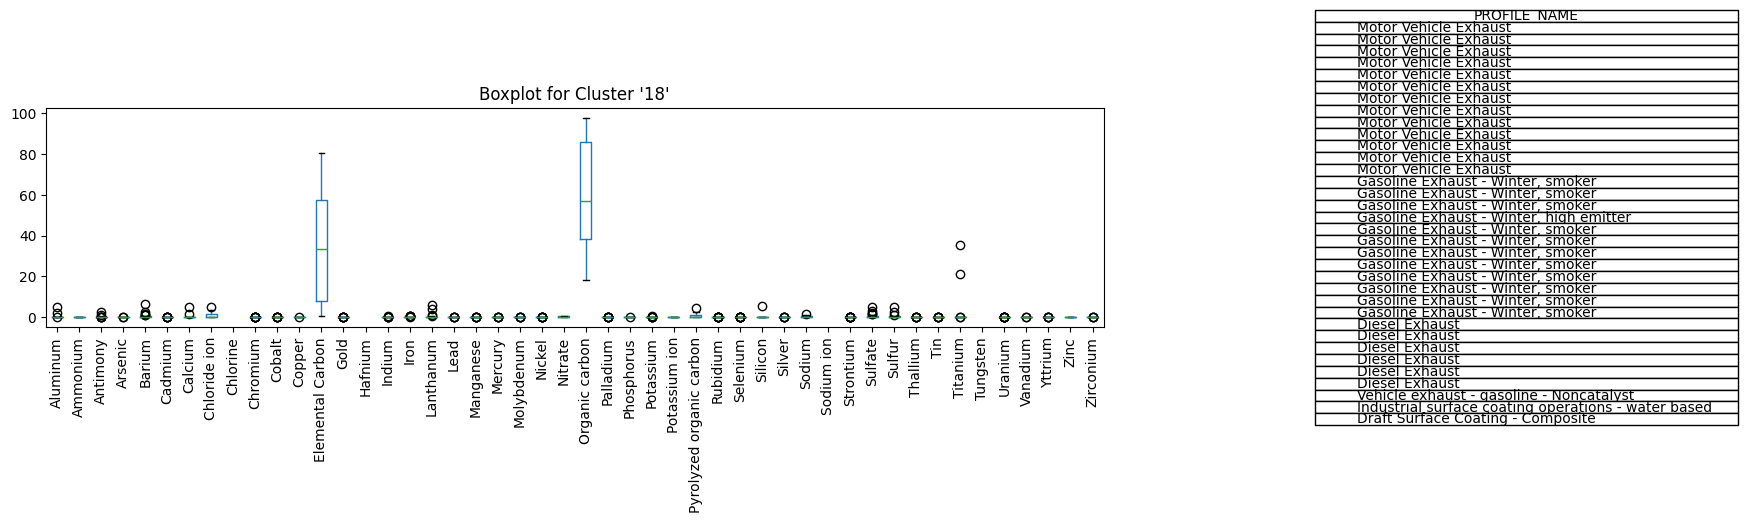

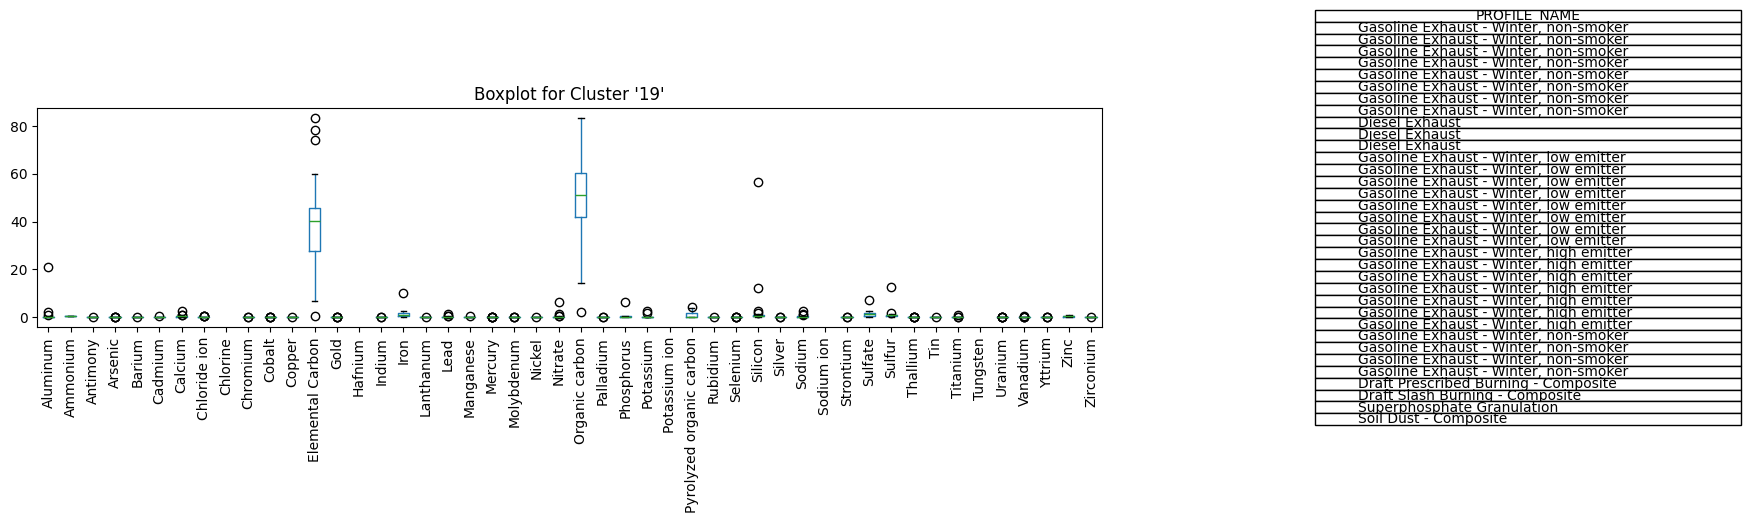

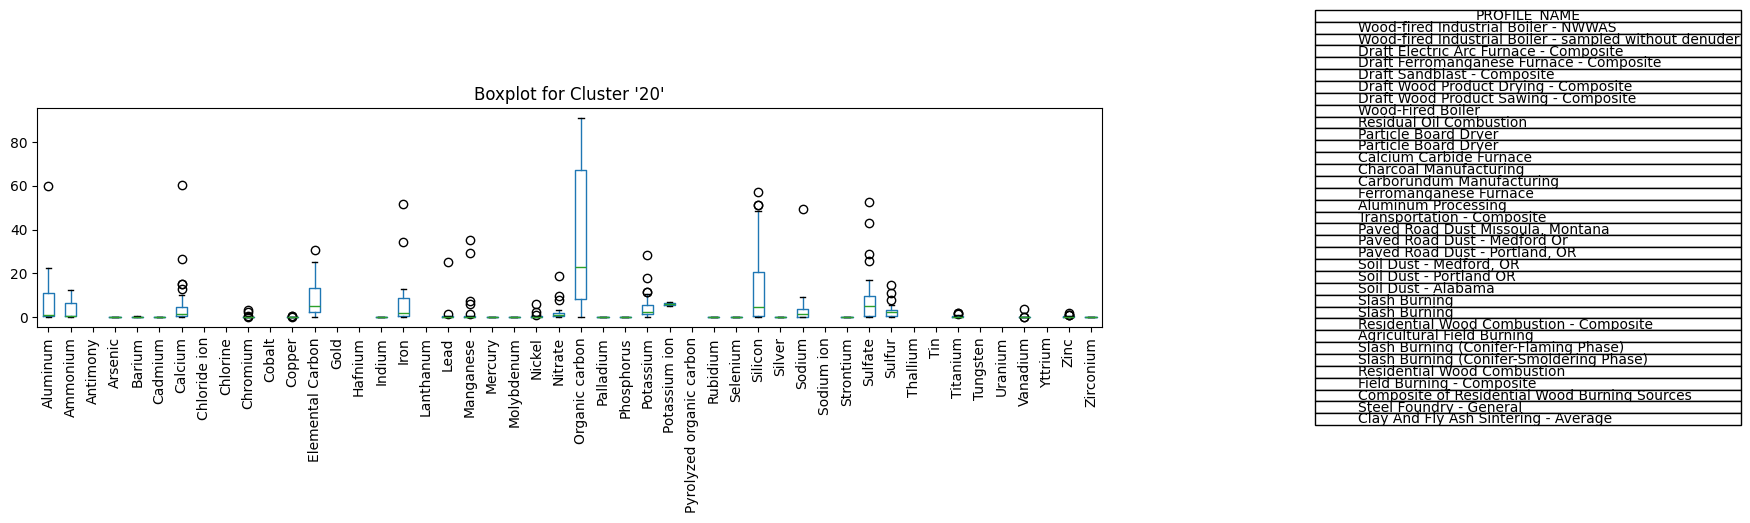

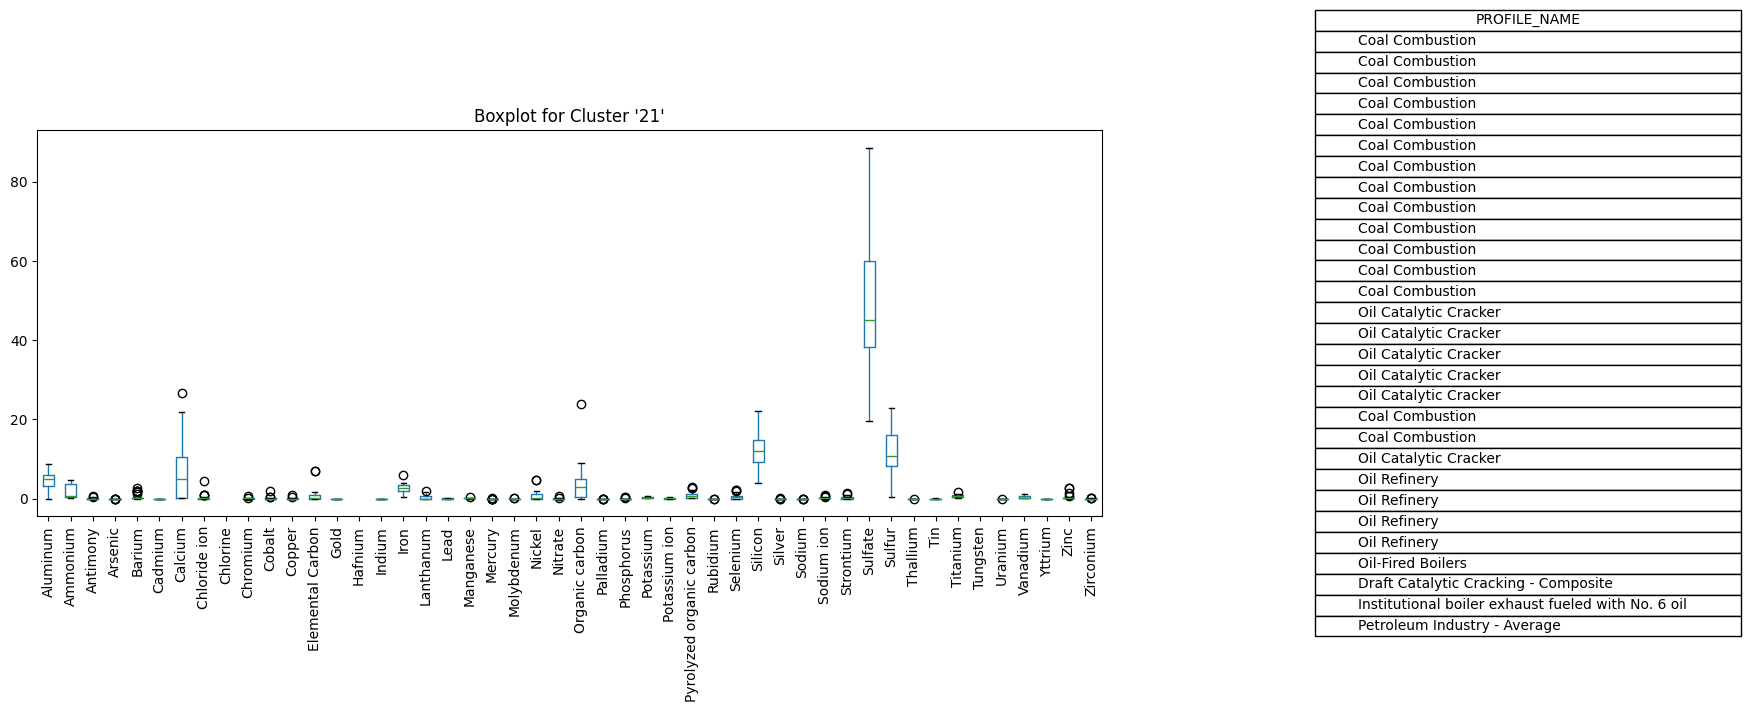

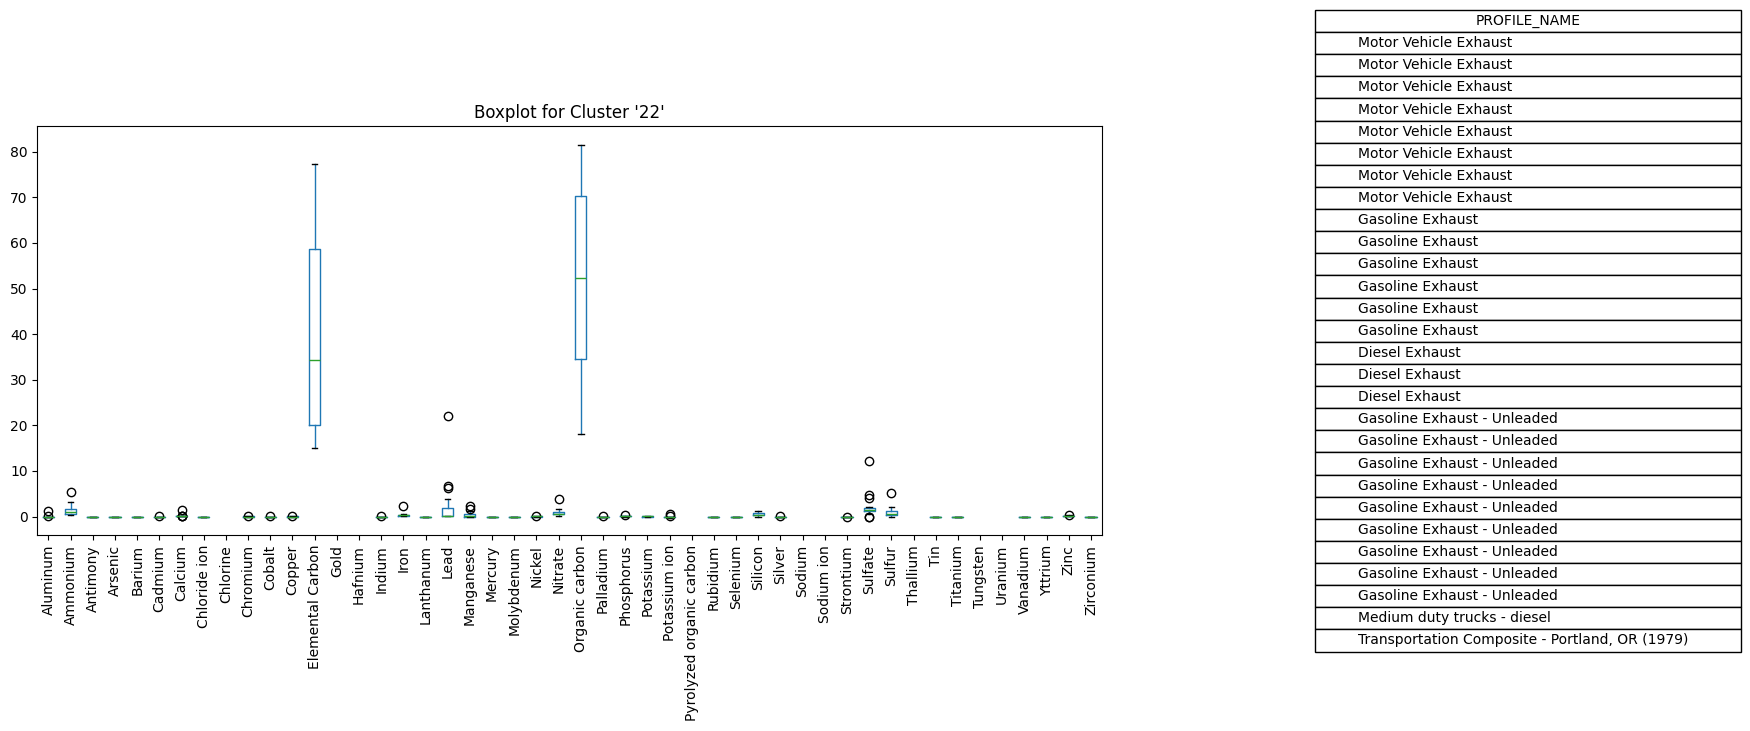

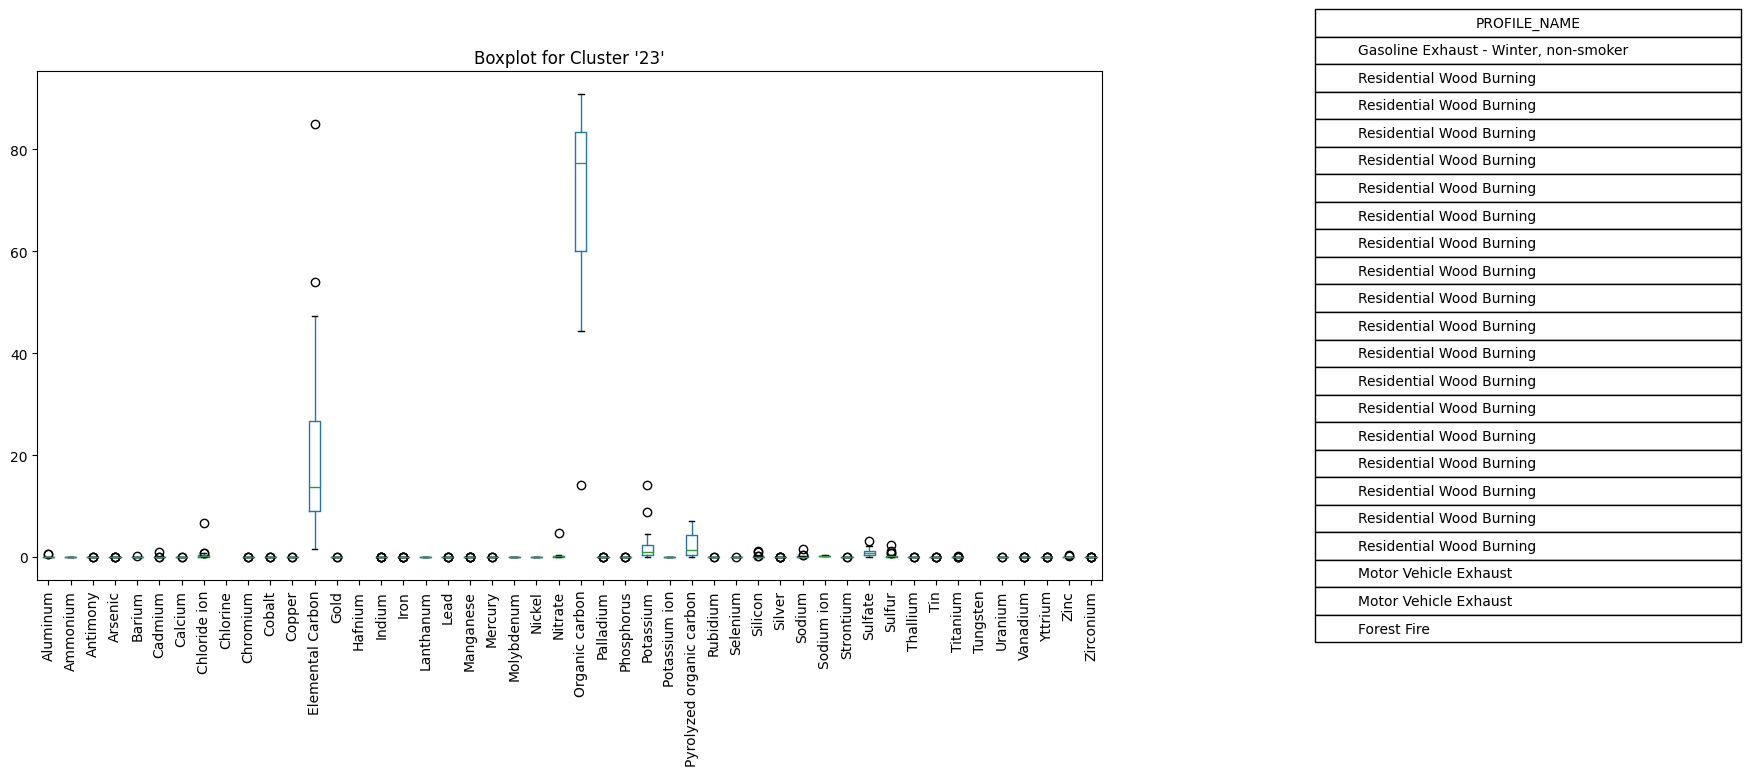

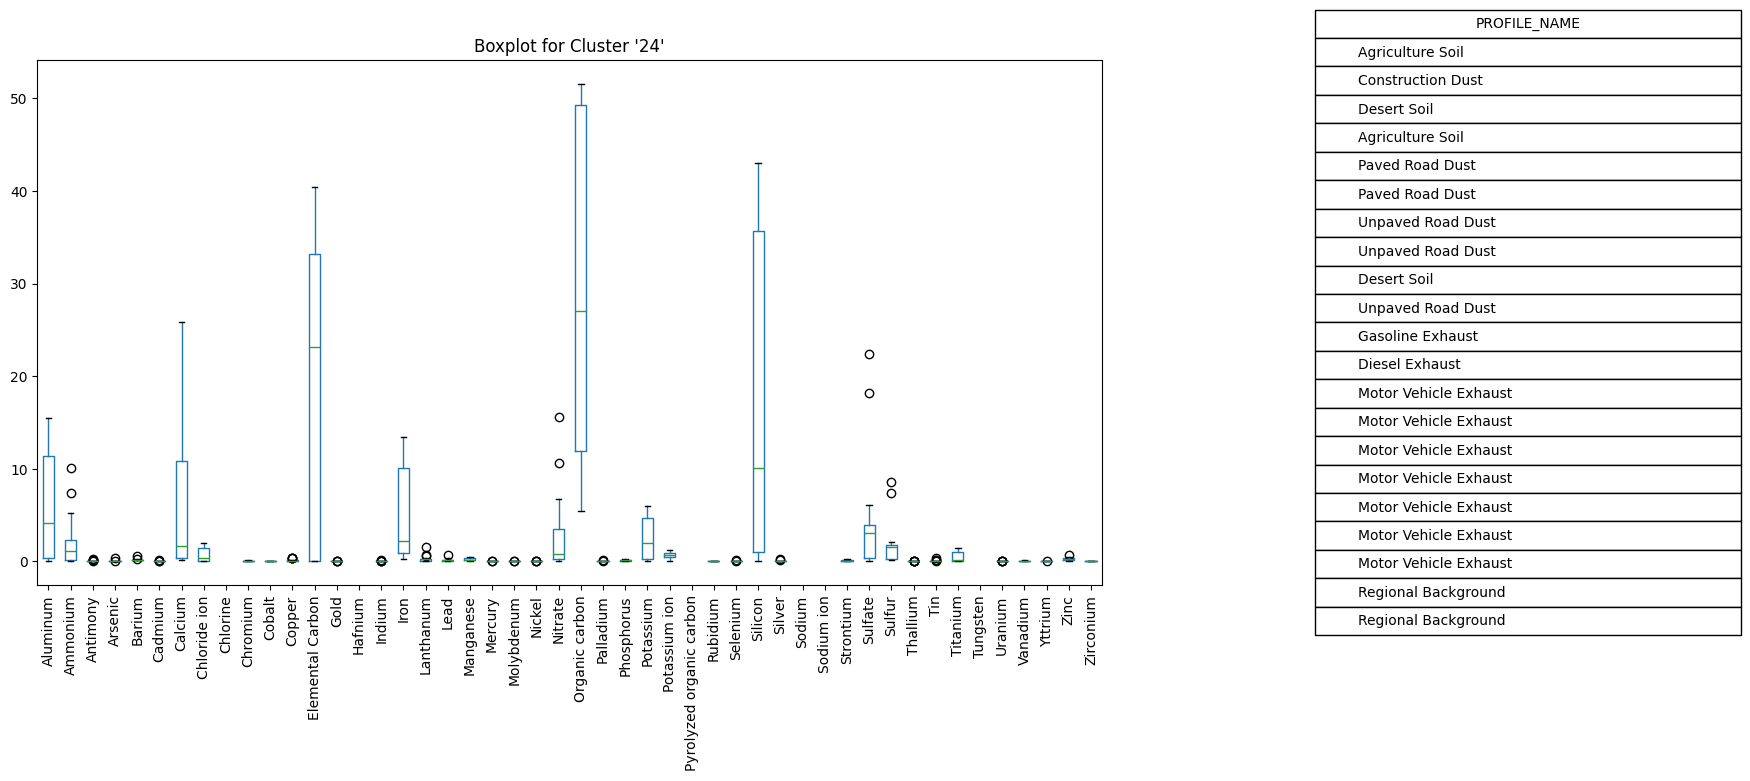

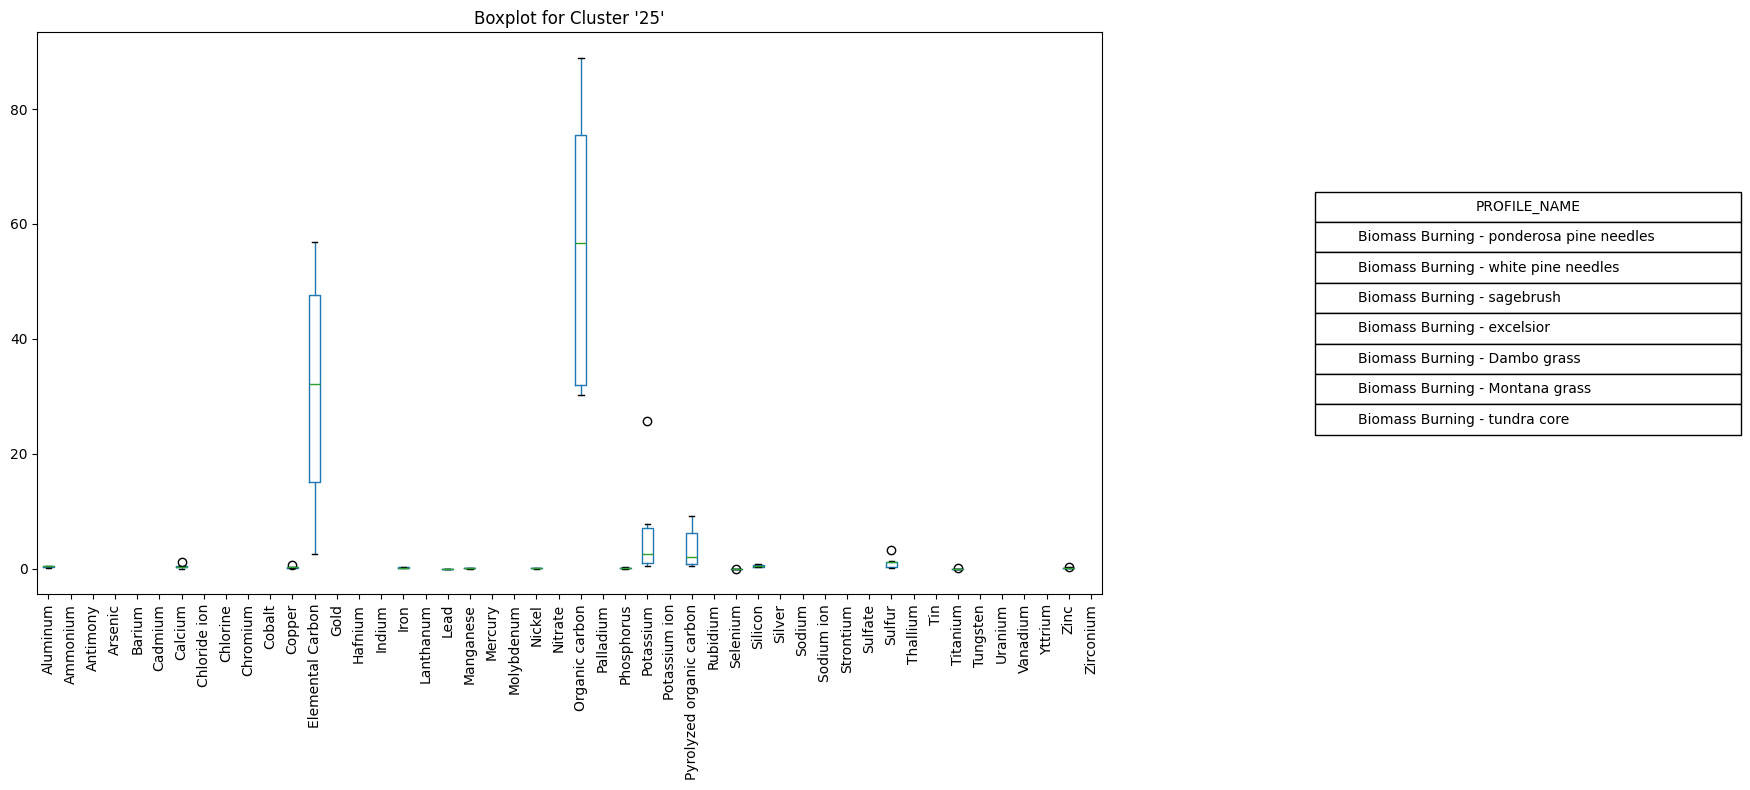

In [ ]:
for i, cluster in enumerate(coms.communities):
    selected_rows = df.loc[cluster]

    fig, ax = plt.subplots(figsize=(18, 8))
    selected_rows.iloc[:, 2:53].boxplot(ax=ax, grid=False)
    ax.grid(False)
    #plt.yscale('log') # saikat
    plt.title(f"Boxplot for Cluster '{i}'")
    plt.xticks(rotation=90)  # Rotate x-labels if needed

    # Create a divider for the existing axes instance
    divider = make_axes_locatable(ax)
    ax_table = divider.append_axes("right", size="20%", pad=0.00)

    # Hide the axes for the table
    ax_table.axis('off')

    # Create the table
    table_data = selected_rows[['PROFILE_NAME']]# selected_rows[['Saritha_Saikat_Assigned']]
    table = ax_table.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='left', loc='right')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2, 2)
    plt.tight_layout()
    #fig.savefig(f'plot_{i+1}.png')
    plt.plot()